# Trabajo de fin de Master

El CSV que se ha seleccionado corresponde al estudio Nº 3452 realizado por el CIS y en el que se indaga a través de una encuesta telefónica sobre la participación o no en las elecciones para el parlamento europeo de junio del 2024. Dicha encuesta obra bajo el nombre de 'Etiquetas.csv' el cual fuera enriquesido como se detallara en el documento 'README_2.md'. Es el que se usará para el TFM por lo que en algunos puntos nos detendremos en su análisis, sobre todo en las columnas que se eliminarán.  

El objetivo del TFM: lograr un algoritmo que prediga a qué partido votará un individuo con un determinado perfil. Sin embargo, a efectos de esta práctica evaluable nos atendremos a las consignas especificadas. 
En la fase de exploración del Set de datos, se procede a la eliminación de las columnas que no aportaban relevancia al cometido del objetivo del TFM y por lo solicitado en la prueba evaluable.

<details open>
<summary><strong>📘 Índice</strong></summary>

- [A. 📚 Librerías](#a--📚-librerías)
- [B. 📂 Carga de datos](#b--📂-carga-de-datos)
- [1. 📊 Visualización de datos](#1--📊-visualización-de-datos)
- [2.a 🔎 Exploración del set de datos](#2a--🔎-exploración-del-set-de-datos)
- [2.b 🧹 Limpieza del set de datos](#2b--🧹-limpieza-del-set-de-datos)
- [3. 📈 Análisis exploratorio](#3--📈-análisis-exploratorio)
  - [3.1 🔧 Tratamiento de Variables Numéricas](#31--🔧-tratamiento-de-variables-numéricas)
    - [a. Edad](##a-edad)
    - [b. Habitantes del municipio](##b-habitantes-del-municipio)
    - [c. Ingreso del hogar](##c-ingreso-del-hogar)
      - [c.1 Análisis estadístico de la columna](###c1-análisis-estadístico-de-la-columna)
      - [c.2 Transformación](###c2-transformación)
    - [d. Renta per cápita (escalado)](##d-renta-per-cápita-escalado)
      - [d.1 Análisis](###d1-análisis)
  - [3.2 📉 Análisis de variables numéricas](##32--📉-análisis-de-variables-numéricas)
  - [3.3 🏷️ Tratamiento de variables categóricas](##33--🏷️-tratamiento-de-variables-categóricas)
    - [A. Comunidad Autónoma](###a-comunidad-autónoma)
    - [b. Sexo](###b-sexo)
    - [c. Percepción de clase social](###c-percepción-de-clase-social)
    - [d. Nivel de educación](###d-nivel-de-educación)
    - [e. Intención de voto (variable objetivo)](###e-intención-de-voto-variable-objetivo)
    - [f. Probabilidad de votar en elecciones generales](###f-probabilidad-de-votar-en-elecciones-generales)
      - [f.1 Gráfico](###f1-gráfico)
    - [G. Auto-ubicación ideológica](##g-auto-ubicación-ideológica)
- [4. 📋 Análisis estadístico descriptivo](#4--📋-análisis-estadístico-descriptivo)

</details>


# A. Librerías necesarias

In [183]:
import pandas as pd
from funpymodeling.exploratory import status, freq_tbl, profiling_num

# B. Carga de datos

In [184]:
data = pd.read_csv ('../Data/Votaciones_Europeas.csv')

# 1. Visualización de Datos

In [185]:
# Visualización 5 primeras columnas del dataset
data.head()

,Comunidad_Autonoma,Renta_Per_Capita_2023_miles_euros,ESTUDIO Código del estudio,REGISTRO Número de registro,CUES Cuestionario,PROV Provincia,MUN Municipio,CAPITAL Capital,TAMUNI Tamaño de municipio,ENTREV Entrevistador/a,...,"IA_C2B_18 Motivos entrevista incorrecta: Valores de cuota anotados incorrectamente, distintos de sexo y edad (provincia/municipio/situación laboral)",IA_C2B_19 Motivos entrevista incorrecta: No se lee el protocolo de inicio o fin de la encuesta,IA_C2B_20 Motivos entrevista incorrecta: Entrevista interrumpida y autocompletada,IA_C2B_21 Motivos entrevista incorrecta: No se leen literalmente las preguntas y/o las opciones de respuesta,IA_C2B_22 Motivos entrevista incorrecta: Induce las respuestas,IA_C2B_23 Motivos entrevista incorrecta: No se recogen fielmente las respuestas espontáneas,IA_C2B_24 Motivos entrevista incorrecta: Lee las categorías de respuesta cuando ésta es espontánea,"IA_C2B_25 Motivos entrevista incorrecta: Codificación incorrecta por parte del entrevistador (Ej. estudios, problemas, preguntas precodificadas…)",IA_C3 Resultado final,IA_C4 Supervisor
0,Andalucía,23218,3452.0000,66503.0000,2668.0000,Almería,Mun.<=100.000 hab. no capitales de CA o provincia,Otros municipios,10.001 a 50.000 habitantes,Anonimizado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andalucía,23218,3452.0000,38712.0000,1690.0000,Almería,Mun.<=100.000 hab. no capitales de CA o provincia,Otros municipios,10.001 a 50.000 habitantes,Anonimizado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andalucía,23218,3452.0000,881.0000,20.0000,Almería,Almería / Barakaldo,Capital de provincia,100.001 a 400.000 habitantes,Anonimizado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andalucía,23218,3452.0000,11038.0000,514.0000,Almería,Almería / Barakaldo,Capital de provincia,100.001 a 400.000 habitantes,Anonimizado,...,No,No,No,No,No,No,No,"Codificación incorrecta por parte del entrevistador (Ej. estudios, problemas, preguntas precodificadas…)",Entrevista válida,Anonimizado
4,Andalucía,23218,3452.0000,15296.0000,747.0000,Almería,Almería / Barakaldo,Capital de provincia,100.001 a 400.000 habitantes,Anonimizado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.a Exploración del Data Set

In [186]:
#Tamaño del dataset

print('Shape: ', data.shape) # Devuelve una dupla
print('Size: ', data.size) # Devuelve el número de filas por el número de columnas
print(len(data)*len(data.columns))

Shape:  (2685, 166)
Size:  445710
445710


In [187]:
# Información resumida sobre columnas -> comprobar tipos de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Columns: 166 entries, Comunidad_Autonoma to IA_C4 Supervisor
dtypes: float64(9), int64(1), object(156)
memory usage: 3.4+ MB


 *Con "Status()" de la librería funpymodeling se obtiene un resumen rápido y completo de la "calidad" de los datos en un DataFrame.  
 Se observa el nombre de las variables, la cantidad de NaN, qué porcentajes de NaN hay en cada columna, el mismo concepto apilicado a  
 los 0, los valores únicos por columnas y el tipo de dato por columnas.*


In [188]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Comunidad_Autonoma,0,0.0000,0,0.0000,19,object
1,Renta_Per_Capita_2023_miles_euros,0,0.0000,0,0.0000,19,int64
2,ESTUDIO Código del estudio,9,0.0034,0,0.0000,1,float64
3,REGISTRO Número de registro,9,0.0034,0,0.0000,2676,float64
4,CUES Cuestionario,9,0.0034,0,0.0000,2676,float64
...,...,...,...,...,...,...,...
161,IA_C2B_23 Motivos entrevista incorrecta: No se recogen fielmente las respuestas espontáneas,2645,0.9851,0,0.0000,2,object
162,IA_C2B_24 Motivos entrevista incorrecta: Lee las categorías de respuesta cuando ésta es espontánea,2645,0.9851,0,0.0000,1,object
163,"IA_C2B_25 Motivos entrevista incorrecta: Codificación incorrecta por parte del entrevistador (Ej. estudios, problemas, preguntas precodificadas…)",2645,0.9851,0,0.0000,2,object
164,IA_C3 Resultado final,2460,0.9162,0,0.0000,1,object


*Otro  modo de visualizar el tipo de objetos...*

In [189]:
print(data.dtypes)

Comunidad_Autonoma                                                                                                                                    object
Renta_Per_Capita_2023_miles_euros                                                                                                                      int64
ESTUDIO Código del estudio                                                                                                                           float64
REGISTRO Número de registro                                                                                                                          float64
CUES Cuestionario                                                                                                                                    float64
                                                                                                                                                      ...   
IA_C2B_23 Motivos entrevista incorrecta: No se recogen fie

*Nota: para el objetivo de TFM seleccionaremos las columnas pertinentes, con este código se obtendrá una lista de las columnas   
para comenzar  a trabajar mirando el objetivo del TFM.*

In [190]:
pd.set_option('display.max_colwidth', None)

for column_name in data.columns.tolist():
    print(column_name)

Comunidad_Autonoma
Renta_Per_Capita_2023_miles_euros
ESTUDIO Código del estudio
REGISTRO Número de registro
CUES Cuestionario
PROV Provincia
MUN Municipio
CAPITAL Capital
TAMUNI Tamaño de municipio
ENTREV Entrevistador/a
TIPO_TEL Tipo de teléfono
SEXO Sexo de la persona entrevistada
EDAD Edad de la persona entrevistada
P0 Nacionalidad de la persona entrevistada
P1 Grado de interés por las noticias relacionadas con la Unión Europea
P2 Grado de información sobre los asuntos relacionados con la Unión Europea
P3 Grado en que las decisiones de la Unión Europea afectan a la vida de los/as españoles/as
P4_1 Los salarios
P4_2 Los precios de bienes y consumos
P4_3 Las oportunidades para encontrar empleo
P4_4 La cultura
P4_5 El desarrollo de las regiones más desfavorecidas
P4_6 Las oportunidades de hacer negocios
P4_7 El peso de España en el mundo
P5 Valoración de la situación económica en caso de no pertenencia de España a la Unión Europea
P6_1 Reforzar la política exterior común europea
P6_2 L

In [191]:
df_filtrado = data.copy()

# 2.b Limpieza de Datos

*A) `Objetivo:`: selección de la columnas que aportan información relevante y creación de un nuevo Set de Datos nombrado "df_filtrado".*

In [192]:
columnas_seleccionadas = [
    'Comunidad_Autonoma',
    'PROV Provincia',
    'TAMUNI Tamaño de municipio',
    'Renta_Per_Capita_2023_miles_euros',
    'SEXO Sexo de la persona entrevistada',
    'EDAD Edad de la persona entrevistada',
    'INGRESHOG Nivel de ingresos netos del hogar',
    'CLASESOCIAL Clase social subjetiva de la persona entrevistada',
    'NIVELESTENTREV Nivel de estudios alcanzado por la persona entrevistada',
    'PROBVOTO Escala de probabilidad de voto (0-10) en supuestas elecciones generales',
    'ESCIDEOL Escala de autoubicación ideológica (1-10)',
    'P5 Valoración de la situación económica en caso de no pertenencia de España a la Unión Europea',
    'INTENCIONG Intención de voto en supuestas elecciones generales',
]

df_filtrado = df_filtrado[columnas_seleccionadas]

*B) `Objetivo:`: rename de los nombres de las columnas*

In [193]:
nuevos_nombres_columnas = {
    'TAMUNI Tamaño de municipio': 'habitantes_municipio',
    'PROV Provincia': 'provincia',
    'SEXO Sexo de la persona entrevistada': 'sexo',
    'EDAD Edad de la persona entrevistada': 'edad',
    'INGRESHOG Nivel de ingresos netos del hogar': 'ingreso_hogar',
    'CLASESOCIAL Clase social subjetiva de la persona entrevistada': 'percepcion_clase_social',
    'NIVELESTENTREV Nivel de estudios alcanzado por la persona entrevistada': 'nivel_educacion',
    'PROBVOTO Escala de probabilidad de voto (0-10) en supuestas elecciones generales': 'probabilidad_voto_generales',
    'ESCIDEOL Escala de autoubicación ideológica (1-10)': 'autoubicacion_ideologica',
    'P5 Valoración de la situación económica en caso de no pertenencia de España a la Unión Europea': 'valoracion_economia_sin_UE',
    'INTENCIONG Intención de voto en supuestas elecciones generales': 'intencion_voto_generales'
}

# Renombrar las columnas en df_filtrado
# se usa inplace=True para aplicar los cambios directamente en el DataFrame
df_filtrado.rename(columns=nuevos_nombres_columnas, inplace=True)

*C) Inspección del df_filtrado*

In [194]:
df_filtrado.head()

,Comunidad_Autonoma,provincia,habitantes_municipio,Renta_Per_Capita_2023_miles_euros,sexo,edad,ingreso_hogar,percepcion_clase_social,nivel_educacion,probabilidad_voto_generales,autoubicacion_ideologica,valoracion_economia_sin_UE,intencion_voto_generales
0,Andalucía,Almería,10.001 a 50.000 habitantes,23218,Mujer,44.0000,De 2.701 a 3.900 &euro;,Clase media-media,Licenciatura (titulaciones con equivalencia oficial: 2º ciclo INEF; Danza y Arte Dramático (desde 1992); Grado Superior de Música),"10 Con toda seguridad, iría a votar",8,Mejor,PP
1,Andalucía,Almería,10.001 a 50.000 habitantes,23218,Hombre,37.0000,Menos de 1.100 &euro;,Clase media-baja,Menos de 5 años de escolarización o primaria incompleta,8,N.S.,Mejor,Voto nulo
2,Andalucía,Almería,100.001 a 400.000 habitantes,23218,Mujer,60.0000,Más de 5.000 &euro;,Clase media-media,Doctorado,"10 Con toda seguridad, iría a votar",10 Derecha,Peor,VOX
3,Andalucía,Almería,100.001 a 400.000 habitantes,23218,Mujer,42.0000,De 3.901 a 5.000 &euro;,Clase media-media,Arquitectura/Ingeniería,"10 Con toda seguridad, iría a votar",4,Peor,No sabe todavía
4,Andalucía,Almería,100.001 a 400.000 habitantes,23218,Hombre,35.0000,Más de 5.000 &euro;,Clase media-media,Arquitectura/Ingeniería,"10 Con toda seguridad, iría a votar",2,Peor,PSOE


In [195]:
status(df_filtrado)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Comunidad_Autonoma,0,0.0000,0,0.0000,19,object
1,provincia,9,0.0034,0,0.0000,39,object
2,habitantes_municipio,9,0.0034,0,0.0000,7,object
3,Renta_Per_Capita_2023_miles_euros,0,0.0000,0,0.0000,19,int64
4,sexo,9,0.0034,0,0.0000,2,object
5,edad,9,0.0034,0,0.0000,78,float64
6,ingreso_hogar,9,0.0034,0,0.0000,8,object
7,percepcion_clase_social,9,0.0034,0,0.0000,15,object
8,nivel_educacion,9,0.0034,0,0.0000,17,object
9,probabilidad_voto_generales,9,0.0034,0,0.0000,13,object


* `Conclusión`:  
*Se observa que las columnas "habitantes_municipio" e "ingreso_hogar" son objetos y describen rangos de habitantes y  
de ingresos, respectivamente. Lo que significará un tipo de manejo en el que habrá que decider cómo transformarlos.  
La columna "Renta_Per_Capita_2023_miles_euros" que proviene del set enriquecido ya había sido tratada y es un entero.  
"edad" la tenemos como float y la pasaremos a entero.  
Se puede observar el impacto que tenemos de los NaN gracias a la librería Funpymodeling, de todos modos, las  
graficaremos a efectos de la prueba evaluable.*


# 3. Análisis Exploratorio

## 3.1 Tratamientos de variables numéricas

## A. Columna edad.  
   `Objetivo:` pasaje de float a entero.

In [196]:
# Pasaje "edad" a entero
df_filtrado['edad'] = df_filtrado['edad'].astype('Int64')

## B. Columna "habitantes_municipio"

*`Objetivo:`  
Ordenar los rangos en donde N.S será la unica variable a la que se le imputará un NaN y de allí un 0. Todo esto para luego graficar y ver  
cómo impacta en la información. El mismo criterio se utilizará en la columna 'ingreso_hogar'.*

In [197]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

orden_habitantes_municipio = [
    'N.S.',
    'Menos o igual a 2.000 habitantes',
    '2.001 a 10.000 habitantes',
    '10.001 a 50.000 habitantes',
    '50.001 a 100.000 habitantes',
    '100.001 a 400.000 habitantes',
    '400.001 a 1.000.000 habitantes',
    'Más de 1.000.000 habitantes'
]

df_filtrado['habitantes_municipio_para_codificar'] = df_filtrado['habitantes_municipio'].fillna('N.S.')

encoder = OrdinalEncoder(categories=[orden_habitantes_municipio], dtype=np.int64)
df_filtrado['habitantes_municipio_codificado'] = encoder.fit_transform(
    df_filtrado[['habitantes_municipio_para_codificar']]
)

df_filtrado['habitantes_municipio_categorizada'] = df_filtrado['habitantes_municipio_para_codificar']

conteo_categorias = df_filtrado['habitantes_municipio_categorizada'].value_counts().reindex(orden_habitantes_municipio).fillna(0)

print("--- Primeras filas con nuevas columnas ---")
print(df_filtrado[['habitantes_municipio', 'habitantes_municipio_para_codificar', 'habitantes_municipio_codificado', 'habitantes_municipio_categorizada']].head())
print("\n--- Conteo de Categorías de Habitantes después de la Transformación ---")
print(conteo_categorias)
print("-------------------------------------------------------------------")

--- Primeras filas con nuevas columnas ---
           habitantes_municipio habitantes_municipio_para_codificar  \
0    10.001 a 50.000 habitantes          10.001 a 50.000 habitantes   
1    10.001 a 50.000 habitantes          10.001 a 50.000 habitantes   
2  100.001 a 400.000 habitantes        100.001 a 400.000 habitantes   
3  100.001 a 400.000 habitantes        100.001 a 400.000 habitantes   
4  100.001 a 400.000 habitantes        100.001 a 400.000 habitantes   

   habitantes_municipio_codificado habitantes_municipio_categorizada  
0                                3        10.001 a 50.000 habitantes  
1                                3        10.001 a 50.000 habitantes  
2                                5      100.001 a 400.000 habitantes  
3                                5      100.001 a 400.000 habitantes  
4                                5      100.001 a 400.000 habitantes  

--- Conteo de Categorías de Habitantes después de la Transformación ---
habitantes_municipio_categoriza

*Se Grafican los resultados obtenidos con la intención de observar los NaN que se han transfomado en 0.*

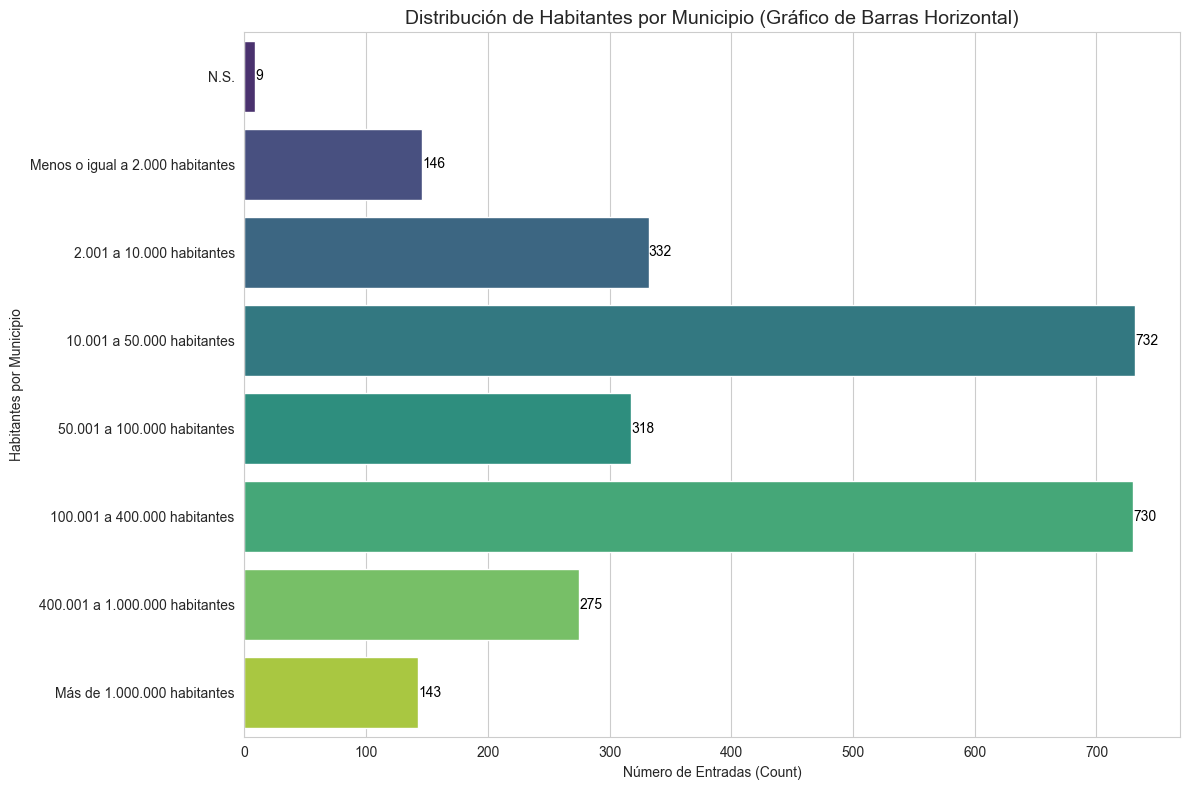

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.barplot(
    x=conteo_categorias.values,
    y=conteo_categorias.index,
    palette='viridis'
)

plt.xlabel('Número de Entradas (Count)')
plt.ylabel('Habitantes por Municipio')
plt.title('Distribución de Habitantes por Municipio (Gráfico de Barras Horizontal)', fontsize=14)

for index, value in enumerate(conteo_categorias.values):
    if value > 0:
        plt.text(value, index, str(int(value)), va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

* `Conclusión`:  
*El gráfico nos muestra que el impacto de los NaN ahora convertidos a 0 es imperceptible, de todos modos, se decide no eliminarlos  
puesto que estos registros pueden llegar a dar información relevante en otras columnas que ahora no se analizan.* 

### C. Columna ingreso_hogar

*`Objetivo`: organizar el orden de los ingresos de mayor a menor, rellenar los Nan con N.S, pasar los N.C. a N.C. Finalizado el proceso,  
Pasarlos a 0 y hacer encoder sobre el resto de rangos*

In [199]:
orden_ingresos = [
    'N.S.', # Esta será la única categoría para "desconocido/no contesta"
    'Menos de 1.100 &euro;',
    'De 1.100 a 1.800 &euro;',
    'De 1.801 a 2.700 &euro;',
    'De 2.701 a 3.900 &euro;',
    'De 3.901 a 5.000 &euro;',
    'Más de 5.000 &euro;',
]

# Rellenar los valores NaN con 'N.S.'
df_filtrado['ingreso_hogar'] = df_filtrado['ingreso_hogar'].fillna('N.S.')

# Convertir los valores 'N.C.' a 'N.S.'
df_filtrado['ingreso_hogar'] = df_filtrado['ingreso_hogar'].replace('N.C.', 'N.S.')


# Inicializar el OrdinalEncoder 
encoder_ingreso_hogar = OrdinalEncoder(categories=[orden_ingresos]) 

df_filtrado['ingreso_hogar_temp_codificado'] = encoder_ingreso_hogar.fit_transform(
    df_filtrado[['ingreso_hogar']]
).ravel()

# La lógica de la lambda es para que N.S. (codificado como 0) se mantenga en 0,
# y el resto de las categorías (codificadas como 1, 2, etc.) se mantengan como tal.
df_filtrado['ingreso_hogar_codificado_final'] = df_filtrado['ingreso_hogar_temp_codificado'].apply(
    lambda x: 0 if x == 0 else x
)

# Reemplazar la columna original y forzar el tipo de dato a int64
df_filtrado['ingreso_hogar'] = df_filtrado['ingreso_hogar_codificado_final'].astype('int64')

# Eliminar las columnas temporales

df_filtrado.drop(columns=['ingreso_hogar_temp_codificado', 'ingreso_hogar_codificado_final'], inplace=True)


*Visiualización por medio de gráfico el impacto de los 0 en la variable ingreso_hogar en relación a columnas edad y habitantes_municipio, respectivamente.*

--- Visualizaciones para 'edad', 'ingreso_hogar' y 'habitantes_municipio_codificado' ---


/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


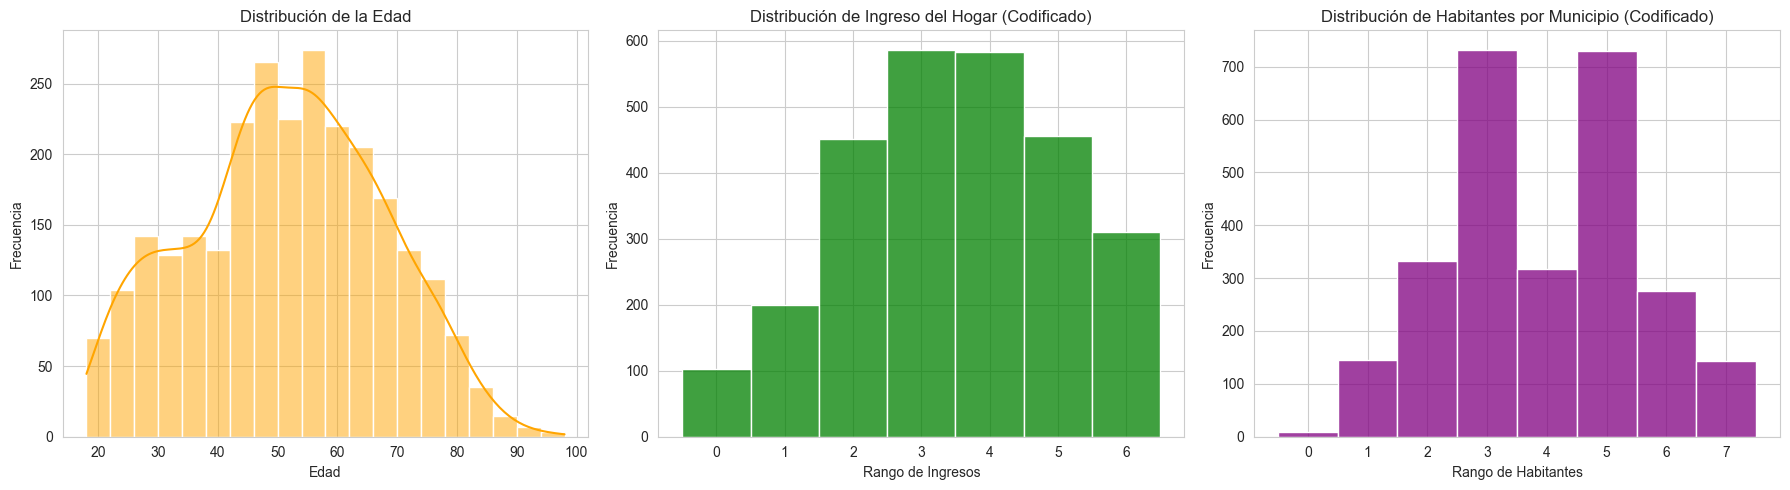

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print("--- Visualizaciones para 'edad', 'ingreso_hogar' y 'habitantes_municipio_codificado' ---")

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# --- Visualización de 'edad' ---
plt.subplot(1, 3, 1) # 1 fila, 3 columnas, posición 1
sns.histplot(df_filtrado['edad'], kde=True, bins=20, color='orange')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# --- Visualización de 'ingreso_hogar' ---
plt.subplot(1, 3, 2) # 1 fila, 3 columnas, posición 2

sns.histplot(df_filtrado['ingreso_hogar'], kde=False,
             bins=np.arange(df_filtrado['ingreso_hogar'].min(), df_filtrado['ingreso_hogar'].max() + 2) - 0.5, # Ajuste para centrar barras en enteros
             color='green')
plt.title('Distribución de Ingreso del Hogar (Codificado)')
plt.xlabel('Rango de Ingresos')
plt.ylabel('Frecuencia')


# --- Visualización de 'habitantes_municipio_codificado' ---
plt.subplot(1, 3, 3) # 1 fila, 3 columnas, posición 3
# Usamos 'habitantes_municipio_codificado' que es numérica
sns.histplot(df_filtrado['habitantes_municipio_codificado'], kde=False,
             bins=np.arange(df_filtrado['habitantes_municipio_codificado'].min(), df_filtrado['habitantes_municipio_codificado'].max() + 2) - 0.5, # Ajuste para centrar barras en enteros
             color='purple')
plt.title('Distribución de Habitantes por Municipio (Codificado)')
plt.xlabel('Rango de Habitantes')
plt.ylabel('Frecuencia')

plt.tight_layout() # Ajustar el diseño para que no se superpongan los gráficos
plt.show()

*  `Conclusión`: 
*En el caso de los 0 en los habitantes por municipio y la de los ingresos vemos que el impacto no es relevante teniendo  
en cuenta el tamaño del Set de Datos... sin embargo, los trataremos y no los eliminaremos a efetos de la Prueba Evaluable.  
En otro contexto yo los eliminaría.*

* `Nota`:  
*Se reemplaza los 0 por la moda en ingresos_hogar. Es simple de implementar y al ser un  
porcentaje tan bajo (0.03) no se corre el peligro de información sesgada. La misma lógica  
para habitantes_municipio, en este caso hay 9 ceros...*

transformacion

In [201]:
# Se Calcula la moda de los valores no cero en 'ingreso_hogar'
moda_ingreso_hogar = df_filtrado[df_filtrado['ingreso_hogar'] != 0]['ingreso_hogar'].mode()[0]

# Se Reemplaza todos los '0' de la columna 'ingreso_hogar' con la moda calculada
df_filtrado['ingreso_hogar'] = df_filtrado['ingreso_hogar'].replace(0, moda_ingreso_hogar)

In [202]:
# Se calcula la moda de los valores no cero en 'habitantes_municipio'
# Si hay varias modas, se toma la primera.
moda_habitantes_municipio = df_filtrado[df_filtrado['habitantes_municipio'] != 0]['habitantes_municipio'].mode()[0]

# Se reemplaza todos los '0' de la columna 'habitantes_municipio' con la moda calculada
df_filtrado['habitantes_municipio'] = df_filtrado['habitantes_municipio'].replace(0, moda_habitantes_municipio)

*D. Escalado de la Renta Per Cápita (Renta_Per_Capita_2023_miles_euros)*

In [203]:
media_original = df_filtrado['Renta_Per_Capita_2023_miles_euros'].mean()
std_original = df_filtrado['Renta_Per_Capita_2023_miles_euros'].std()

print(f"Media original: {media_original:,.2f} €")
print(f"Desviación estándar original: {std_original:,.2f} €")


Media original: 28,936.95 €
Desviación estándar original: 5,373.11 €


In [204]:
# (1) Si la columna escalada no existe, recreación:
if 'Renta_Per_Capita_2023_miles_euros_escalada' not in df_filtrado.columns:
    df_filtrado['Renta_Per_Capita_2023_miles_euros_escalada'] = (
        (df_filtrado['Renta_Per_Capita_2023_miles_euros'] - media_original) / std_original
    )

# (2) Creación de la columna en euros con un nombre claro
df_filtrado['Renta_Per_Capita_2023_miles_euros_original'] = (
    df_filtrado['Renta_Per_Capita_2023_miles_euros_escalada'] * std_original + media_original
)


* D.1 Análisis
* `Nota`: Grafico para visualiazar las características del escalado realizado.

/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


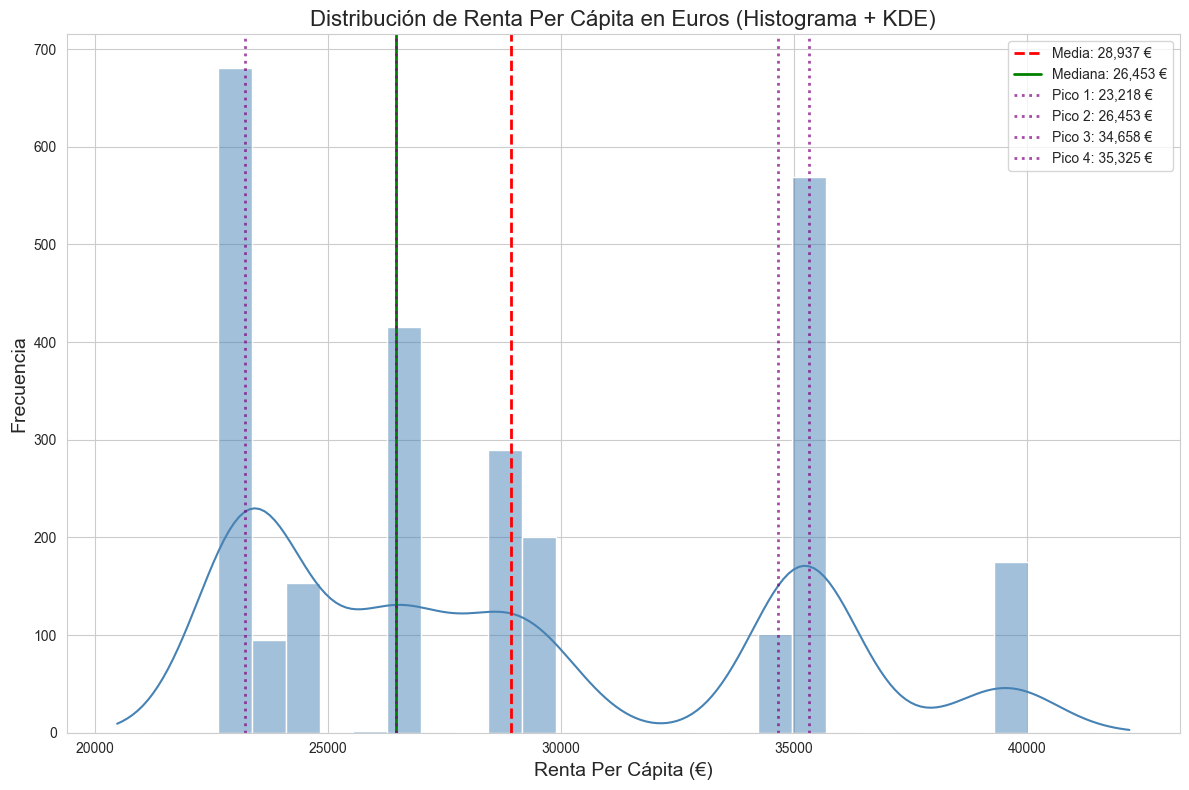

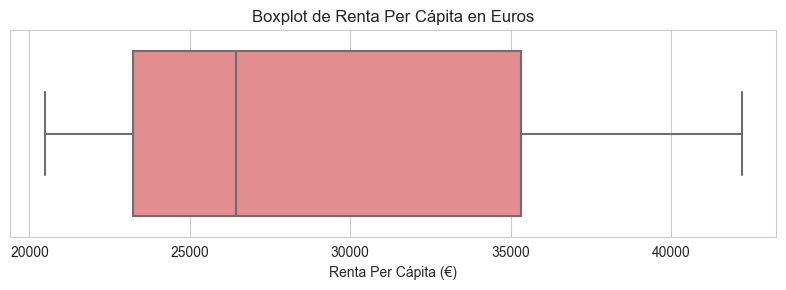

In [205]:
# Se Calcula estadísticos en euros originales
renta_euros = df_filtrado['Renta_Per_Capita_2023_miles_euros_original']

media = renta_euros.mean()
mediana = renta_euros.median()

# Modas: Se toman  hasta 4 picos más frecuentes
modas = renta_euros.value_counts().index[:4].tolist()

# En lugar de modas exactas, para acercarse a los picos (porque es variable continua),
# podemos usar un método alternativo: detectar picos en KDE o aproximar con percentiles
# Aquí, para simplificar, vamos a estimar los picos por percentiles
picos_estimados = [
    renta_euros.quantile(0.20),  # ~23.000 - 24.000
    renta_euros.quantile(0.40),  # ~26.000 - 27.000
    renta_euros.quantile(0.70),  # ~35.000
    renta_euros.quantile(0.90)   # ~40.000
]

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Histograma con KDE
sns.histplot(renta_euros, bins=30, kde=True, color='steelblue')

# Líneas verticales para media y mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:,.0f} €')
plt.axvline(mediana, color='green', linestyle='solid', linewidth=2, label=f'Mediana: {mediana:,.0f} €')

# Líneas verticales para picos estimados (modas aproximadas)
for i, pico in enumerate(picos_estimados):
    plt.axvline(pico, color='purple', linestyle='dotted', linewidth=2, alpha=0.7, label=f'Pico {i+1}: {pico:,.0f} €')

plt.title('Distribución de Renta Per Cápita en Euros (Histograma + KDE)', fontsize=16)
plt.xlabel('Renta Per Cápita (€)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Evitar etiquetas duplicadas en leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

# Opcional: Boxplot para ver dispersión y outliers
plt.figure(figsize=(8, 3))
sns.boxplot(x=renta_euros, color='lightcoral')
plt.title('Boxplot de Renta Per Cápita en Euros')
plt.xlabel('Renta Per Cápita (€)')
plt.tight_layout()
plt.show()


# Análisis de la Distribución de la Renta Per Cápita (Valores Originales en Euros)

El presente estudio analiza la distribución de la renta per cápita en su escala original, expresada en miles de euros. Aunque la visualización gráfica empleada se basa en valores estandarizados mediante *StandardScaler*, las inferencias descriptivas y numéricas que se presentan a continuación se fundamentan en los valores reales de ingresos.

## Análisis Descriptivo

### 1. Distribución y Forma

La distribución de la renta per cápita no se ajusta a una distribución normal, sino que exhibe una morfología irregular y presenta una clara multimodalidad, evidenciada por la presencia de múltiples picos significativos. Esta característica sugiere la existencia de distintos subgrupos o estratos socioeconómicos diferenciados dentro de la población en función de sus niveles de ingreso.

Además, la distribución manifiesta una asimetría positiva (sesgo hacia la derecha), en la cual la mayor parte de las observaciones se concentra en rangos relativamente bajos, mientras que una cola prolongada se extiende hacia niveles superiores de renta, lo que indica la presencia de individuos con ingresos significativamente elevados.

### 2. Medidas de Tendencia Central: Media y Mediana

- **Media:** 28.936,95 €
- **Mediana:** 26.453,00 €

La media excede notablemente a la mediana, confirmando la asimetría positiva observada. Esta diferencia implica que la mayoría de la población percibe ingresos por debajo del promedio, mientras que un conjunto reducido de observaciones con valores excepcionalmente altos incrementa el valor medio general.

### 3. Modas y Concentraciones en la Distribución

Se identifican varios modos o picos de alta frecuencia en los siguientes intervalos aproximados:

- Entre 23.000 y 24.000 €
- Entre 26.000 y 27.000 €
- Alrededor de 35.000 €
- Un grupo menor cerca de 40.000 €

La existencia de estos picos sustenta la hipótesis de estratificación socioeconómica o demográfica, donde cada estrato presenta una concentración predominante de renta.

## Implicaciones Socioeconómicas

La configuración de la distribución evidencia una desigualdad significativa en la renta per cápita. La predominancia de segmentos poblacionales en los rangos bajos y medios (23.000–27.000 €) contrasta con la presencia de un grupo minoritario con ingresos elevados, lo cual podría reflejar una concentración de la riqueza en los estratos superiores de la población estudiada.

## Identificación y Caracterización de Valores Atípicos

Aunque el análisis no incorpora un diagrama de caja específico, la distribución sugiere que, si bien existe una considerable dispersión, no se detectan valores atípicos extremos que se alejen de forma significativa del cuerpo principal de los datos. La mayoría de los ingresos se localiza dentro de un rango esperado y razonable. Por otra parte, la amplitud del rango intercuartílico (IQR), que es aproximadamente 12.000 €, evidencia una elevada variabilidad de los ingresos en el segmento central (entre el 25 % y el 75 % de la población).

### Percentiles Aproximados (estimados a partir de los datos originales)

- **Primer cuartil (Q1, 25 %):** ~23.000 €
- **Mediana (Q2, 50 %):** ~26.500 €
- **Tercer cuartil (Q3, 75 %):** ~35.000 €
- **Límite superior aproximado:** ~42.000 € 
- **Límite inferior aproximado:** ~20.000 € 

Este análisis conjunto proporciona una comprensión profunda de la heterogeneidad y desigualdad de la renta per cápita en la población, siendo congruente con las observaciones visuales y estadísticas realizadas.


`Nota`: *Observar valores outlaiers*

## 3.2 `Análisis` de las variables numéircas con profiling_num:

In [206]:
profiling_num(df_filtrado)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Renta_Per_Capita_2023_miles_euros,28936.9534,5373.1068,0.1857,23218.0000,23218.0000,23218.0000,26453.0000,35325.0000,39547.0000,39547.0000
1,Renta_Per_Capita_2023_miles_euros_escalada,-0.0000,1.0000,-5904377441157120.0000,-1.0644,-1.0644,-1.0644,-0.4623,1.1889,1.9747,1.9747
2,Renta_Per_Capita_2023_miles_euros_original,28936.9534,5373.1068,0.1857,23218.0000,23218.0000,23218.0000,26453.0000,35325.0000,39547.0000,39547.0000
3,edad,51.3053,16.1486,0.3148,19,24,40,52,63,77,85
4,habitantes_municipio_codificado,3.9400,1.5711,0.3988,1.0000,1.0000,3.0000,4.0000,5.0000,7.0000,7.0000
5,ingreso_hogar,3.5858,1.4338,0.3998,1.0000,1.0000,3.0000,4.0000,5.0000,6.0000,6.0000


* `conclusión`: *Renta_Per_Capita_2023_miles_euros muestra un comportamiento inusual en sus percentiles extremos, lo que merece una exploración más profunda (visualizaciones como histogramas o boxplots).  
Se considera que esta variable muestra esas diferencias por cuestiones sociológicas, políticas y económicas, no son "anomalías" en los datos.  
Considerar el Binning (conversión a variable categórica) podría ser especialmente relevante. Si esos puntos son efectivamente límites o centros de categorías de renta impuestos por políticas, convertirlos en categorías discretas (ej. "Renta Baja", "Renta Media-Baja", etc., basándote en esos puntos de corte) podría ser la forma más fiel de representar los datos en el modelo. Por otro lado, de mantener la variable como numérica, se debe ser consciente de esos puntos de concentración al interpretar los resultados de futuros modelos.*


## 3.3. Tratamiento de las variables Categóricas

In [207]:
# Identifica y lista los nombres de las columnas que son de tipo 'object' o 'category'
variables_categoricas = df_filtrado.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprime la lista de variables categóricas
print("Las variables categóricas en el DataFrame son:")
print(variables_categoricas)

Las variables categóricas en el DataFrame son:
['Comunidad_Autonoma', 'provincia', 'habitantes_municipio', 'sexo', 'percepcion_clase_social', 'nivel_educacion', 'probabilidad_voto_generales', 'autoubicacion_ideologica', 'valoracion_economia_sin_UE', 'intencion_voto_generales', 'habitantes_municipio_para_codificar', 'habitantes_municipio_categorizada']


### A. Comunidad_Autonoma, Provincia

### Desición sobre las columnas Provincia vs. Comunidad_Autónoma. 
#### El problema de la dimensionalidad

<u>Contexto y análisis estadístico</u> 

En el análisis estadístico que consta en el archivo "Estadísticas.ipynb" realizado anteriormente, observamos que las dos variables geográficas se relacionan con variables socioeconómicas distintas:

Comunidad Autónoma mostró una relación estadística con la variable Renta_Per_Capita_2023_miles_euros. A nivel agregado, distintas comunidades presentan medias de renta per cápita diferenciadas y relativamente estables, reflejo de disparidades regionales estructurales.
Provincia se vinculó con la distribución de la variable ingreso_hogar, aunque con mayor heterogeneidad interna. A nivel provincial, los rangos de ingresos del hogar presentaron mayor dispersión, probablemente por el efecto de municipios de tamaños diversos y características socioeconómicas mixtas.
Este análisis sugirió que cada nivel territorial añade información complementaria:

Comunidad Autónoma capta disparidades macroeconómicas y políticas regionales.
Provincia introduce variación geográfica más granulada y local.
No obstante, ambas variables son jerárquicamente dependientes (la provincia determina la comunidad autónoma), lo que impone el reto de redundancia y multicolinealidad si se usan simultáneamente sin procesar.

Problemas al codificar ambas variables directamente

Si se aplicara One-Hot Encoding sin más tendríamos como resultado redundancia estructural. En efecto, la relación jerárquica implicaría columnas fuertemente correlacionadas y
multicolinealidad que afectaría negativamente a modelos lineales (coeficientes inestables) y podría confundir interpretaciones causales. Además de obtener
dimensionalidad excesiva, 39 columnas para provincias mas 19 para comunidades, es decir, 58 columnas binarias con valores dispersos.

Decisión metodológica: usar PCA para fusión y reducción

Para resolver este problema sin perder información relevante, se ha decidido:

√ Codificar simultáneamente provincia y Comunidad_Autonoma con One-Hot Encoding.  
√ Aplicar Análisis de Componentes Principales (PCA) para reducir la dimensionalidad.

Ventajas:

- Compresión de la información en menos columnas (en este caso 10).
- Eliminación de multicolinealidad: los componentes principales son ortogonales.
- Conservación de varianza relevante: los primeros componentes capturan la estructura conjunta entre provincia y comunidad, incorporando su dependencia jerárquica y sus diferencias socioeconómicas.
- Mantener explicabilidad comparada: al no aplicar PCA por separado a cada variable, se preserva la capacidad de captar la relación observada entre provincia ↔ ingreso_hogar y comunidad ↔ renta per cápita.


*`Objetivo`:* Optimizar la representación de las variables geográficas (Provincia y Comunidad_Autonoma) mediante One-Hot Encoding y PCA  
en Provincia para reducir dimensionalidad y preparar los datos para modelos de ML.*

Bloque 1 – Imports necesarios

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


 Bloque 2 – Filtrado y limpieza de datos

In [209]:
# Eliminar filas con valores nulos en las columnas relevantes
df_filtrado = df_filtrado.dropna(subset=['provincia', 'Comunidad_Autonoma']).copy()

Bloque 3 – One-Hot Encoding de 'provincia' y 'Comunidad_Autonoma'

In [210]:

# Codificación One-Hot de ambas columnas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded_array = encoder.fit_transform(df_filtrado[['provincia', 'Comunidad_Autonoma']])
nombres_columnas_codificadas = encoder.get_feature_names_out(['provincia', 'Comunidad_Autonoma'])

# Crear DataFrame codificado con el mismo índice
df_categorico_ohe = pd.DataFrame(categorical_encoded_array, columns=nombres_columnas_codificadas, index=df_filtrado.index)


Bloque 4 – Aplicar PCA a las variables categóricas codificadas

In [211]:

# Aplicación de PCA con 10 componentes
pca = PCA(n_components=10)
componentes_pca = pca.fit_transform(df_categorico_ohe)
nombres_componentes = [f'categorico_pca_{i}' for i in range(componentes_pca.shape[1])]

# Crear DataFrame de componentes y añadirlo al dataset filtrado
df_componentes_pca = pd.DataFrame(componentes_pca, columns=nombres_componentes, index=df_filtrado.index)
df_filtrado = pd.concat([df_filtrado, df_componentes_pca], axis=1)

# Eliminar columnas originales
df_filtrado.drop(columns=['provincia', 'Comunidad_Autonoma'], inplace=True)


Bloque 5 -  Resumen estadístico de los componentes PCA

In [212]:

# Estadística descriptiva de los componentes PCA
df_filtrado[[col for col in df_filtrado.columns if "categorico_pca_" in col]].describe().T

,count,mean,std,min,25%,50%,75%,max
categorico_pca_0,2676.0000,-0.0000,0.5759,-0.6454,-0.5394,-0.0940,-0.0762,1.1448
categorico_pca_1,2676.0000,-0.0000,0.5037,-1.0403,-0.1675,-0.1243,0.5219,0.6664
categorico_pca_2,2676.0000,0.0000,0.4053,-0.7576,-0.4286,0.2143,0.2683,0.6281
categorico_pca_3,2676.0000,-0.0000,0.3296,-0.7053,-0.1263,0.0322,0.0401,0.9566
categorico_pca_4,2676.0000,0.0000,0.3053,-0.5802,-0.0205,0.0189,0.0285,0.9914
categorico_pca_5,2676.0000,0.0000,0.2936,-0.7320,-0.0019,-0.0009,0.0002,0.9636
categorico_pca_6,2676.0000,-0.0000,0.2586,-0.2678,-0.1015,-0.0321,-0.0045,1.2083
categorico_pca_7,2676.0000,-0.0000,0.2461,-0.4178,-0.0191,-0.0043,0.0017,0.9176
categorico_pca_8,2676.0000,0.0000,0.2393,-0.4943,-0.0780,-0.0199,0.0555,1.0375
categorico_pca_9,2676.0000,0.0000,0.2382,-0.4870,-0.0615,-0.0151,0.0174,0.6696


<u>Conclusión y justificación</u>

√ Este pipeline conserva toda la información relevante de ambas variables geográficas, combinando la granularidad provincial con la heterogeneidad estructural autonómica.  
√ La reducción a 10 componentes logra mitigar el problema de alta dimensionalidad, mejorando la eficiencia computacional y reduciendo el riesgo de sobreajuste.  
√ La ortogonalidad impuesta por PCA elimina multicolinealidad y estabiliza el entrenamiento de modelos posteriores.  
√ Finalmente, esta estrategia es coherente con el análisis estadístico (ver "Estadisticas.ipynb") previo, ya que las asociaciones socioeconómicas detectadas (provincia-ingreso_hogar y comunidad-renta per cápita) quedan preservadas en el espacio latente generado por el PCA.


Tras esta transformación, la columna Comunidad_Autonoma será eliminada de nuestro conjunto de datos, ya que su información estará adecuadamente representada (y de forma más granular y eficiente) por los componentes PCA derivados de provincia.

Este proceso asegura que las características geográficas se representen de manera robusta, optimizada y lista para el entrenamiento de modelos de Machine Learning.

Visualización de Resultados de PCA para la Variable Geográfica (provincia)

Comprender los resultados del Análisis de Componentes Principales (PCA) puede ser un desafío, ya que los componentes generados no tienen una interpretación directa e intuitiva. Sin embargo, la visualización es una herramienta poderosa para extraer insights y confirmar la efectividad de la reducción de dimensionalidad.

Hemos generado dos tipos de gráficos clave para interpretar cómo PCA ha transformado la información de la provincia:

* #### 1. Gráfico de Varianza Explicada (Scree Plot)

Este gráfico muestra la proporción de varianza total de los datos originales que es capturada por cada componente principal individualmente, así como la varianza acumulada.

Interpretación del Scree Plot:

Barras (Varianza Individual): Observación de cómo la altura de las barras disminuye rápidamente. Esto indica que los primeros componentes (ej., provincia_pca_0, provincia_pca_1) capturan una cantidad significativamente mayor de información que los componentes posteriores.  

Línea Roja (Varianza Acumulativa): Esta línea muestra cuánta información total de las provincias originales se está reteniendo con un número creciente de componentes. Es una guía para saber cuántos componentes podrían ser "suficientes" para el análisis (por ejemplo, si 5 componentes explicaran el 80 % de la varianza, sería un buen punto de equilibrio).


Bloque 5 – Scree plot (Varianza explicada)

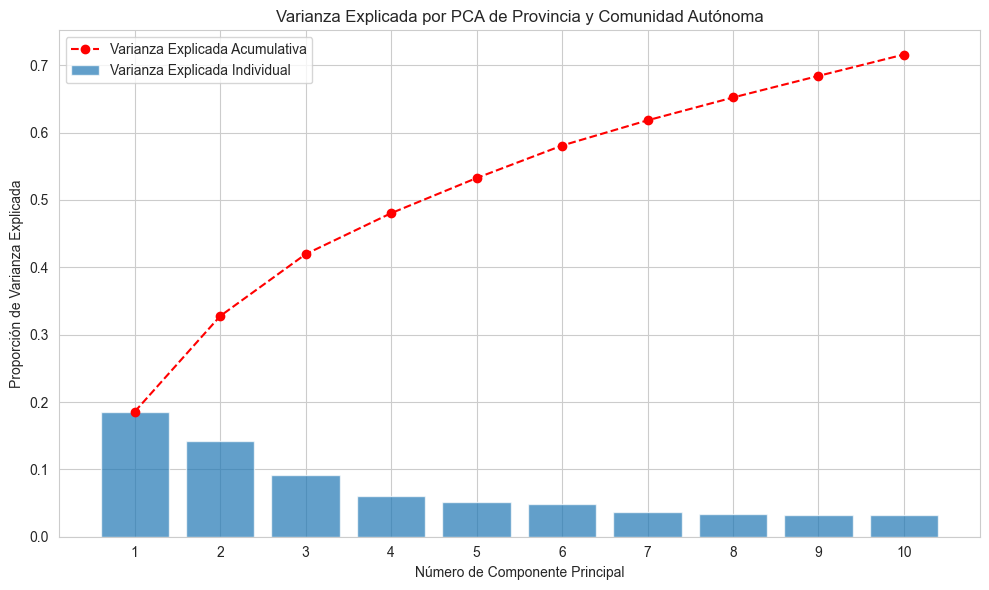

Varianza explicada por los 10 componentes: 71.60%


In [213]:
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.bar(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    alpha=0.7,
    label='Varianza Explicada Individual'
)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    explained_variance_cumulative,
    marker='o',
    linestyle='--',
    color='red',
    label='Varianza Explicada Acumulativa'
)
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por PCA de Provincia y Comunidad Autónoma')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.legend()
plt.tight_layout()
plt.show()

print(f"Varianza explicada por los 10 componentes: {pca.explained_variance_ratio_.sum():.2%}")


Tras aplicar PCA a las variables codificadas de provincia y comunidad autónoma, se obtiene que los 10 componentes principales explican el 71.60 % de la varianza total. Este resultado indica que se conserva más de dos tercios de la información original en un espacio de menor dimensión, permitiendo reducir la complejidad del modelo y mitigar la multicolinealidad. Sin embargo, implica también una pérdida controlada de interpretabilidad respecto a las categorías geográficas originales.

* #### 2. Gráfico de Dispersión de los Primeros Dos Componentes

Este gráfico visualiza la distribución de los datos en las dos dimensiones más importantes que PCA ha identificado. Cada punto representa una observación (una fila del dataset) proyectada en este nuevo espacio reducido.  

Interpretación del Gráfico de Dispersión:

Cada punto en este gráfico corresponde a un individuo del dataset.
Su posición indica el valor que ese individuo tiene en el primer (provincia_pca_0) y segundo (provincia_pca_1) componente principal.
Aunque estos valores no se traducen directamente a una provincia o un significado literal, la visualización puede revelar patrones de agrupamiento o separación en los datos geográficos. Los clústeres distintos sugieren que PCA ha logrado identificar diferencias significativas entre grupos de provincias.
Estos gráficos, combinados con las estadísticas de la varianza explicada, brindan una comprensión profunda de cómo PCA ha transformado y compactado la compleja información de las variables geográficas.

 Bloque 6 – Gráfico de dispersión de los dos primeros componentes

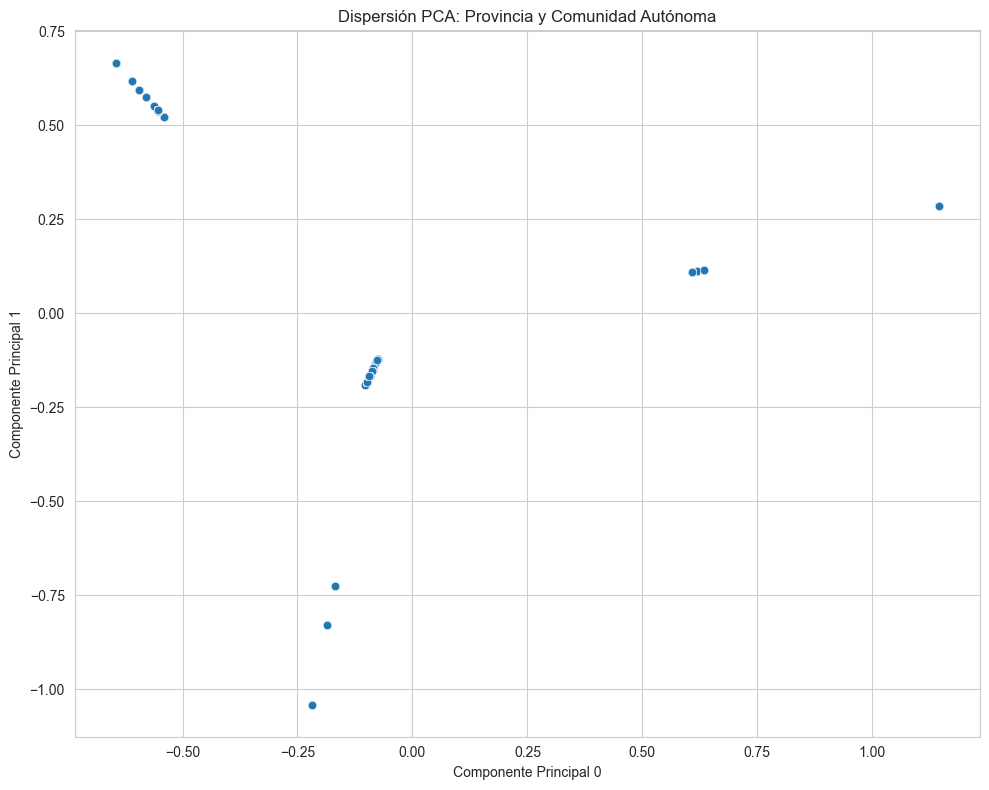

In [214]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='categorico_pca_0',
    y='categorico_pca_1',
    data=df_filtrado,
    alpha=0.6
)
plt.xlabel('Componente Principal 0')
plt.ylabel('Componente Principal 1')
plt.title('Dispersión PCA: Provincia y Comunidad Autónoma')
plt.grid(True)
plt.tight_layout()
plt.show()


*`Conclusión`: 
La reducción de dimensionalidad mediante PCA y la agrupación en clústeres permiten representar eficientemente la información  
geográfica detallada de las provincias, mejorando la calidad del modelo al evitar redundancias y multicolinealidad, y facilitando el análisis y la interpretación.*

* `Nota`: Con el código comentad que aparece debajo se vería qué provincias pertenecen a cada clúster después de aplicar PCA y KMeans. Lamentablemente,  
no podrá hacerse ya que había eliminado la columnas necesarias para el análisis de clústeres por desconociiento de esta posibilidad. Sin embargo,  
dejo constancia de esto después de haber investigado sobre el tema.  

Agrupar provincias únicas por clúster:  

provincias_por_cluster = df_con_provincia.groupby('provincia_cluster')['provincia'].unique()  

 Mostrar resultado  

for cluster_id, provincias in provincias_por_cluster.items():  
    print(f"Clúster {cluster_id + 1}:")  
       Sumar 1 se desea que la numeración empiece en 1  
       for provincia in provincias:  
       print(f"  - {provincia}")  
       print()

Bloque 6. Correlación con renta per cápita e ingreso del hogar

Objetivo:
Examinar si los componentes geográficos (PCA) retienen gradientes socioeconómicos.

√ Esto valida que no se pierde toda la señal de renta/ingresos al comprimir la dimensión geográfica.

In [215]:
variables_socioeco = [
    'Renta_Per_Capita_2023_miles_euros_escalada',
    'ingreso_hogar'
]

componentes_pca_cols = [col for col in df_filtrado.columns if "categorico_pca_" in col]

# Calcular matriz de correlación
corrs = df_filtrado[componentes_pca_cols + variables_socioeco].corr()

# Mostrar correlaciones específicas
corrs.loc[variables_socioeco, componentes_pca_cols]


,categorico_pca_0,categorico_pca_1,categorico_pca_2,categorico_pca_3,categorico_pca_4,categorico_pca_5,categorico_pca_6,categorico_pca_7,categorico_pca_8,categorico_pca_9
Renta_Per_Capita_2023_miles_euros_escalada,0.7395,-0.0952,-0.2776,-0.2521,0.4139,-0.1860,0.0932,-0.0835,-0.2265,-0.0906
ingreso_hogar,0.1159,-0.0001,-0.0065,-0.0464,0.0789,-0.0138,-0.0287,-0.0424,-0.0658,-0.0094


 Bloque 7. Heatmap de correlaciones

Objetivo:
Visualizar de forma más intuitiva la dependencia entre la representación PCA de la geografía y las variables de renta/ingresos.

Confirmar la utilidad explicativa de los componentes.

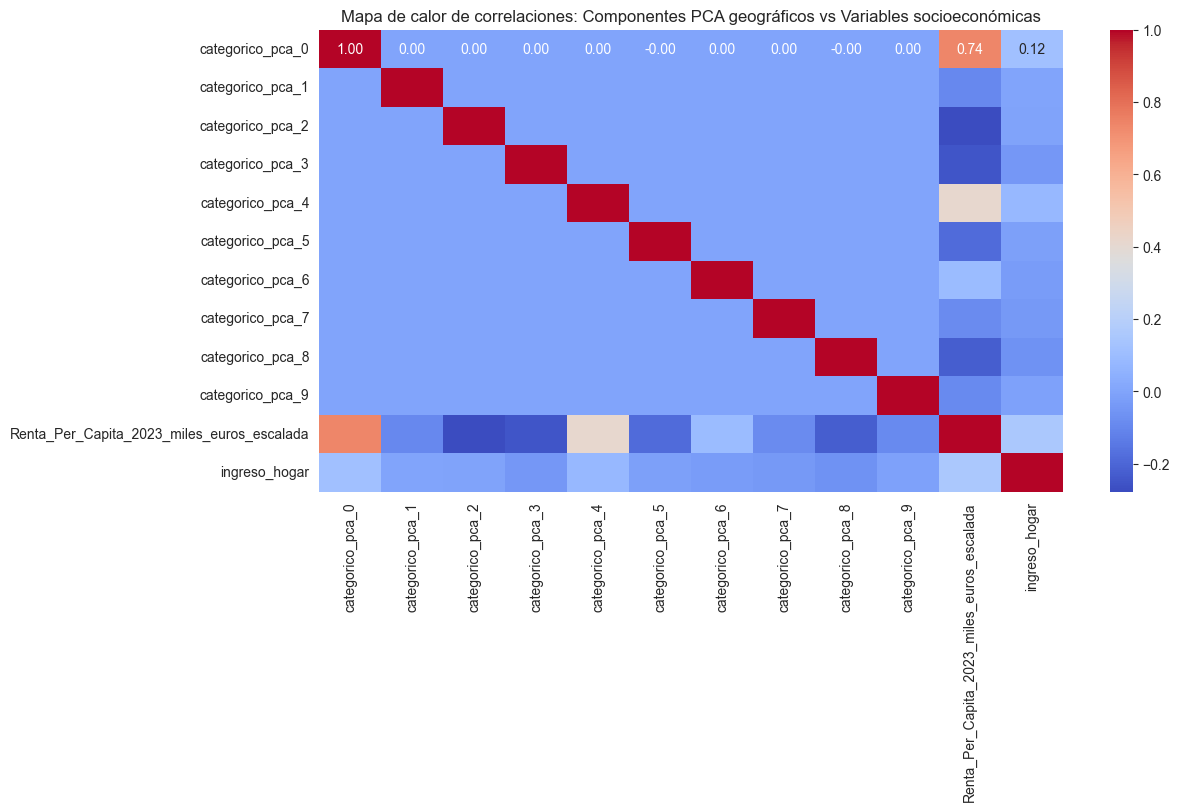

In [216]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_filtrado[componentes_pca_cols + variables_socioeco].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title('Mapa de calor de correlaciones: Componentes PCA geográficos vs Variables socioeconómicas')
plt.show()


In [217]:
# BLOQUE 7 - Imprimir correlaciones numéricas de forma legible

pd.set_option('display.float_format', lambda x: '%.4f' % x)
correlaciones = df_filtrado[componentes_pca_cols + variables_socioeco].corr()

# Filtrar solo las correlaciones entre socioeconómicas y componentes
corr_socioeco_pca = correlaciones.loc[variables_socioeco, componentes_pca_cols]

print("Correlaciones entre variables socioeconómicas y componentes PCA:")
print(corr_socioeco_pca)


Correlaciones entre variables socioeconómicas y componentes PCA:
                                            categorico_pca_0  \
Renta_Per_Capita_2023_miles_euros_escalada            0.7395   
ingreso_hogar                                         0.1159   

                                            categorico_pca_1  \
Renta_Per_Capita_2023_miles_euros_escalada           -0.0952   
ingreso_hogar                                        -0.0001   

                                            categorico_pca_2  \
Renta_Per_Capita_2023_miles_euros_escalada           -0.2776   
ingreso_hogar                                        -0.0065   

                                            categorico_pca_3  \
Renta_Per_Capita_2023_miles_euros_escalada           -0.2521   
ingreso_hogar                                        -0.0464   

                                            categorico_pca_4  \
Renta_Per_Capita_2023_miles_euros_escalada            0.4139   
ingreso_hogar                      

<u>`Conclusión final de correlación, implicaciones para la modelización:`</u>

Tras aplicar el Análisis de Componentes Principales (PCA) a la codificación One-Hot de las variables geográficas (provincia y comunidad autónoma), se realizó un estudio de correlación para evaluar la relación entre los nuevos componentes generados y las variables socioeconómicas clave (renta per cápita e ingreso del hogar). Los resultados muestran coeficientes de correlación cercanos a cero en todos los casos, reflejando la ausencia de una relación lineal sustancial.

Este hallazgo es relevante por varias razones metodológicas:

El PCA transforma las variables originales en un conjunto de componentes no correlacionados entre sí, optimizando la varianza explicada de las combinaciones lineales de las categorías originales. Al hacerlo, elimina multicolinealidad y reduce la dimensionalidad de los datos, facilitando el entrenamiento de modelos más estables y eficientes.
Sin embargo, esta transformación no está orientada a maximizar la capacidad predictiva respecto a variables externas al bloque geográfico, como los ingresos. La información útil que pudiera haber existido en la codificación original respecto a patrones socioeconómicos (por ejemplo, provincias con niveles de renta promedio más altos) puede quedar dispersa o atenuada en los componentes resultantes.
En términos prácticos, la matriz de correlación calculada confirma este fenómeno al mostrar valores cercanos a cero, lo que implica que, tras la reducción de dimensionalidad, ya no es posible extraer relaciones lineales directas entre la información geográfica comprimida y las variables de renta o ingreso.

Este resultado conlleva implicaciones importantes para el diseño del pipeline de modelización.

Balance entre reducción de dimensionalidad y explicabilidad:  
Aunque el PCA ayuda a simplificar los datos y prevenir sobreajuste, puede reducir la capacidad de interpretar o explotar directamente las relaciones socioeconómicas latentes en la geografía.

Decisión sobre codificación geográfica:  
Dada la pérdida de interpretabilidad lineal, podría valorarse mantener una codificación más sencilla (One-Hot sin PCA) si la dimensionalidad es aceptable, o bien reducir la granularidad empleando solo la comunidad autónoma.  

Modelos no lineales:  
Aunque la correlación lineal es nula, modelos más complejos (por ejemplo, árboles de decisión, redes neuronales) podrían capturar patrones no lineales entre los componentes PCA geográficos y las variables socioeconómicas.  

Posibles alternativas de ingeniería de características:  
En lugar de PCA, se podrían emplear técnicas más orientadas a la predicción supervisada (por ejemplo, PLS - Partial Least Squares), o generar variables agregadas basadas en estadísticas geográficas (media de renta per cápita por provincia) para mantener la señal socioeconómica de manera más directa.  

En suma, la aplicación de PCA ha sido exitosa en términos de reducción de dimensionalidad y eliminación de multicolinealidad. No obstante, ha demostrado limitar la capacidad de explicar de forma lineal las variables socioeconómicas clave. Por ello, se tendría que evaluar empíricamente el rendimiento predictivo del modelo con y sin esta transformación, para determinar si la ganancia en simplicidad y estabilidad compensa la posible pérdida de capacidad explicativa. De todos modos, en primera instancia, se continuará con la PCA puesto que paracería no ser un factor decisivo a la hora de considerar la variable objetivo.

### B. Tratamiento Columna Sexo

In [218]:
print("--- Columna: sexo ---")
print(df_filtrado['sexo'].dtype)
print(df_filtrado['sexo'].value_counts(dropna=False))
print("\n")

--- Columna: sexo ---
object
sexo
Hombre    1413
Mujer     1263
Name: count, dtype: int64




In [219]:
df_filtrado = df_filtrado.rename(columns={'sexo': 'genero'})

In [220]:
# Crear 'genero_encoded', porque al reejecutar el notebook había un error.
df_filtrado['genero_encoded'] = df_filtrado['genero'].replace({'Hombre': 1, 'Mujer': 0})


/var/folders/sx/wcjxctx124nfmsy8rzkg0f500000gn/T/ipykernel_8732/1097131696.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtrado['genero_encoded'] = df_filtrado['genero'].replace({'Hombre': 1, 'Mujer': 0})


In [221]:
df_filtrado['genero_encoded'] = df_filtrado['genero_encoded'].astype(pd.Int64Dtype())
df_filtrado.dropna(subset=['genero_encoded'], inplace=True)


In [222]:

print(f"Filas después de procesar 'genero': {df_filtrado.shape[0]}")
print("Verificación de 'genero_encoded':")
print(df_filtrado['genero_encoded'].value_counts(dropna=False))


Filas después de procesar 'genero': 2676
Verificación de 'genero_encoded':
genero_encoded
1    1413
0    1263
Name: count, dtype: Int64


### C. percepción_clase_social

In [223]:
df_filtrado['percepcion_clase_social'].dtype
df_filtrado['percepcion_clase_social'].value_counts(dropna=False)

percepcion_clase_social
Clase media-media            1339
Clase media-baja              326
Clase trabajadora/obrera      291
Clase baja                    288
Clase media-alta              139
Otras                          76
No sabe, duda                  73
Clase pobre                    54
No cree en las clases          26
A la gente común               24
Clase alta                     18
N.C.                           14
Proletariado                    5
A los/as de abajo               2
Excluidos/as                    1
Name: count, dtype: int64

En el siguiente mapeo de las clases sociales se determina que "No sabe, duda" (73)  
"N.C." (14) y "No cree en las clases" (26), otras (76) , representan un 7,06%  
No es poco pero lo asumimos.


In [224]:
# Mapeo de las clases sociales. los reduciremos a 3 categorías: Alta, Media y Baja.
mapeo_clase_social = {
    'Clase alta': 'Alta',
    'Clase media-alta': 'Media',
    'Clase media-media': 'Media',
    'Clase media-baja': 'Media',
    'Clase baja': 'Baja',
    'Clase trabajadora/obrera': 'Baja',
    'Clase pobre': 'Baja',
    'Proletariado': 'Baja',
    'A los/as de abajo': 'Baja',
    'Excluidos/as': 'Baja',
    'A la gente común': 'Baja', # Incluida en 'Baja'
    # Categorías que irán a NaN y luego se eliminarán
    'No sabe, duda': pd.NA,
    'N.C.': pd.NA,
    'No cree en las clases': pd.NA,
    'Otras': pd.NA,
    'nan': pd.NA # Para los NaNs que pudieran haberse convertido a string 'nan'
}

In [225]:
# Limpiar espacios en la columna 'percepcion_clase_social'
df_filtrado['percepcion_clase_social'] = df_filtrado['percepcion_clase_social'].astype(str).str.strip()

# Aplicar el mapeo a una nueva columna
df_filtrado['percepcion_clase_agrupada'] = df_filtrado['percepcion_clase_social'].replace(mapeo_clase_social)

In [226]:
# Eliminar NaNs de 'percepcion_clase_agrupada' ANTES de codificar
print(f"Filas antes de eliminar NaNs en 'percepcion_clase_agrupada': {df_filtrado.shape[0]}")
df_filtrado.dropna(subset=['percepcion_clase_agrupada'], inplace=True)
print(f"Filas después de eliminar NaNs en 'percepcion_clase_agrupada': {df_filtrado.shape[0]}")

# Definir el orden para el OrdinalEncoder y aplicar
orden_ordinal_clase = ['Baja', 'Media', 'Alta']
encoder_clase = OrdinalEncoder(categories=[orden_ordinal_clase], dtype='int64')
df_filtrado['percepcion_clase_encoded'] = encoder_clase.fit_transform(df_filtrado[['percepcion_clase_agrupada']])

# Verificar el resultado final
print("\n--- Columna: percepcion_clase_encoded ---")
print(df_filtrado['percepcion_clase_encoded'].dtype)
print(df_filtrado['percepcion_clase_encoded'].value_counts(dropna=False))

print("\n--- Vista previa del DataFrame ---")
print(df_filtrado[['percepcion_clase_social', 'percepcion_clase_agrupada', 'percepcion_clase_encoded']].head())

Filas antes de eliminar NaNs en 'percepcion_clase_agrupada': 2676
Filas después de eliminar NaNs en 'percepcion_clase_agrupada': 2487

--- Columna: percepcion_clase_encoded ---
int64
percepcion_clase_encoded
1    1804
0     665
2      18
Name: count, dtype: int64

--- Vista previa del DataFrame ---
  percepcion_clase_social percepcion_clase_agrupada  percepcion_clase_encoded
0       Clase media-media                     Media                         1
1        Clase media-baja                     Media                         1
2       Clase media-media                     Media                         1
3       Clase media-media                     Media                         1
4       Clase media-media                     Media                         1


In [227]:
df_filtrado.drop(columns=['percepcion_clase_social', 'percepcion_clase_agrupada', 'genero'], inplace=True)

### D."nivel_educación"

In [228]:
df_filtrado['nivel_educacion'].dtype
df_filtrado['nivel_educacion'].value_counts(dropna=False)

nivel_educacion
Licenciatura (titulaciones con equivalencia oficial: 2º ciclo INEF; Danza y Arte Dramático (desde 1992); Grado Superior de Música)                                                                                                                                    432
Bachillerato (Bachillerato LOGSE, BUP, Bachillerato Superior (6º), Bachillerato Universitario (7º), incluidos COU y PREU)                                                                                                                                             361
FP de Grado Superior (ciclo/módulo formativo de FP (grado superior) de Artes Plásticas, Diseño, Música y Danza, Deporte, FP II, Bachillerato Laboral Superior, Maestría industrial, perito/a mercantil; Secretariado de 2º grado; Grado Medio conservatorio)          342
Educación secundaria (ESO, EGB. Graduado Escolar. Certificado de Escolaridad, Bachillerato Elemental)                                                                                     

D.1 Bloque 1: Preparación y Definición del Mapeo de Agrupación (incluye limpieza inicial)

In [229]:
# Limpiar espacios en la columna 'nivel_educacion' 
df_filtrado['nivel_educacion'] = df_filtrado['nivel_educacion'].astype(str).str.strip()

# Definir el mapeo de agrupación y los valores a NaN
mapeo_nivel_educacion = {
    'Menos de 5 años de escolarización o primaria incompleta': 'Educación Básica',
    'Educación Primaria (Educación Primaria de LOGSE, 5º curso de EGB, enseñanza primaria antigua)': 'Educación Básica',
    'Educación secundaria (ESO, EGB. Graduado Escolar. Certificado de Escolaridad, Bachillerato Elemental)': 'Educación Básica',
    'F.P. Básica (FPB), cualificación profesional grado inicial (FP grado inicial). PCPI (Programas de Cualificación Profesional Inicial, que no precisan de titulación académica de la primera etapa de secundaria para su realización). Programas de garantía social': 'Educación Básica',

    'Bachillerato (Bachillerato LOGSE, BUP, Bachillerato Superior (6º), Bachillerato Universitario (7º), incluidos COU y PREU)': 'Bachillerato/FP Media',
    'FP de Grado Medio (ciclo/módulo formativo de FP (grado medio), de Artes Plásticas y Diseño, Música y Danza, enseñanzas deportivas, FP I, Bachiller Laboral Elemental. Oficialía Industrial; Bachillerato Comercial)': 'Bachillerato/FP Media',

    'FP de Grado Superior (ciclo/módulo formativo de FP (grado superior) de Artes Plásticas, Diseño, Música y Danza, Deporte, FP II, Bachillerato Laboral Superior, Maestría industrial, perito/a mercantil; Secretariado de 2º grado; Grado Medio conservatorio)': 'FP Superior',

    'Diplomatura (ATENCIÓN: sólo diplomaturas oficiales, no codificar aquí los tres primeros años de una licenciatura o grado con mayor duración)': 'Grado/Diplomatura',
    'Grado (estudios de grado, enseñanzas artísticas equivalentes (desde 2006))': 'Grado/Diplomatura',

    'Licenciatura (titulaciones con equivalencia oficial: 2º ciclo INEF; Danza y Arte Dramático (desde 1992); Grado Superior de Música)': 'Postgrado/Universitario Alto',
    'Arquitectura/Ingeniería Técnica (aparejador/a; peritos/as)': 'Postgrado/Universitario Alto',
    'Arquitectura/Ingeniería': 'Postgrado/Universitario Alto',
    'Máster oficial universitario (especialidades médicas o equivalente)': 'Postgrado/Universitario Alto',
    'Títulos propios de posgrado (máster no oficial, etc.)': 'Postgrado/Universitario Alto',
    'Doctorado': 'Postgrado/Universitario Alto',

    'N.P.': pd.NA,
    'N.S./No recuerda': pd.NA
}

D.2 Bloque 2: Aplicar el Mapeo

In [230]:
df_filtrado['nivel_educacion_agrupado'] = df_filtrado['nivel_educacion'].replace(mapeo_nivel_educacion)

D.3 Bloque 3: Eliminar NaNs de la Columna Agrupada

In [231]:
print(f"Filas ANTES de eliminar NaNs en 'nivel_educacion_agrupado': {df_filtrado.shape[0]}")
df_filtrado.dropna(subset=['nivel_educacion_agrupado'], inplace=True)
print(f"Filas DESPUÉS de eliminar NaNs en 'nivel_educacion_agrupada': {df_filtrado.shape[0]}")

Filas ANTES de eliminar NaNs en 'nivel_educacion_agrupado': 2487
Filas DESPUÉS de eliminar NaNs en 'nivel_educacion_agrupada': 2479


D.4 Bloque 4: Definir el Orden Ordinal

In [232]:
orden_nivel_educacion = [
    'Educación Básica',
    'Bachillerato/FP Media',
    'FP Superior',
    'Grado/Diplomatura',
    'Postgrado/Universitario Alto'
]

D.5 Bloque 5: Aplicar Codificación y Eliminar Columnas Originales

In [233]:
encoder_educacion = OrdinalEncoder(categories=[orden_nivel_educacion], dtype='int64')

df_filtrado['nivel_educacion_encoded'] = encoder_educacion.fit_transform(df_filtrado[['nivel_educacion_agrupado']]) + 1

# Eliminar las columnas originales y agrupadas intermedias
df_filtrado.drop(columns=['nivel_educacion', 'nivel_educacion_agrupado'], inplace=True)

Comprobaciones.

In [234]:

df_filtrado['nivel_educacion_encoded'].dtype
df_filtrado['nivel_educacion_encoded'].value_counts(dropna=False)

nivel_educacion_encoded
5    933
2    514
1    352
3    342
4    338
Name: count, dtype: int64

In [235]:

# Para ver la columna encodificada junto con otras existentes para referencia
df_filtrado[['genero_encoded', 'percepcion_clase_encoded', 'nivel_educacion_encoded']].head()



,genero_encoded,percepcion_clase_encoded,nivel_educacion_encoded
0,0,1,5
1,1,1,1
2,0,1,5
3,0,1,5
4,1,1,5


### E. Columna 'intencion_voto_generales' que será la variable objetivo

In [236]:
freq_tbl(df_filtrado['intencion_voto_generales'])

,intencion_voto_generales,frequency,percentage,cumulative_perc
0,PP,622,0.2509,0.2509
1,PSOE,515,0.2077,0.4587
2,No sabe todavía,390,0.1573,0.6160
3,Sumar,167,0.0674,0.6833
4,VOX,162,0.0653,0.7487
5,N.C.,120,0.0484,0.7971
6,No votaría,94,0.0379,0.8350
7,Podemos,57,0.0230,0.8580
8,En blanco,54,0.0218,0.8798
9,JxCat,54,0.0218,0.9016


Se genera un gráfico comparado entre las variables de Clases sociales, intención de voto (votará o no).


--- Análisis Visual de Percepción de Clase Social para los que 'No sabe todavía' (Intención de Voto) ---
Número de registros con 'No sabe todavía': 390



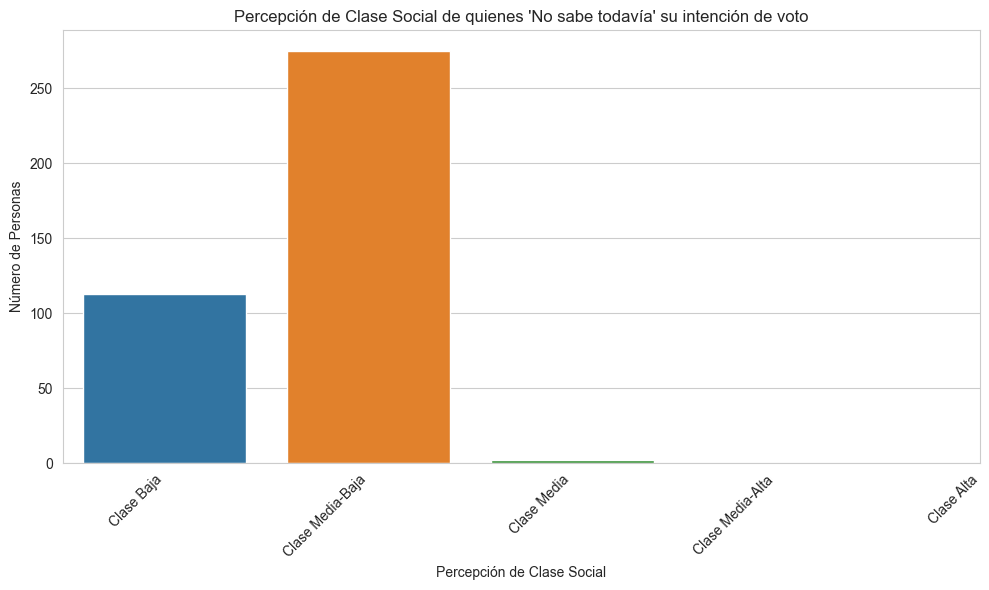

In [237]:
# Se Define el orden de las etiquetas originales para que el gráfico sea legible

orden_percepcion_clase_labels = [
    'Clase Baja',
    'Clase Media-Baja',
    'Clase Media',
    'Clase Media-Alta',
    'Clase Alta'
]


# se Filtra el DataFrame para obtener solo las filas donde la intención de voto es 'No sabe todavía'
df_no_sabe_todavia = df_filtrado[df_filtrado['intencion_voto_generales'] == 'No sabe todavía'].copy()

print(f"\n--- Análisis Visual de Percepción de Clase Social para los que 'No sabe todavía' (Intención de Voto) ---")
print(f"Número de registros con 'No sabe todavía': {df_no_sabe_todavia.shape[0]}\n")

# Ahora, se crea el gráfico de barras utilizando 'percepcion_clase_encoded'
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_no_sabe_todavia,
    x='percepcion_clase_encoded',
    order=sorted(df_no_sabe_todavia['percepcion_clase_encoded'].unique()) # Asegura el orden numérico en el eje X
)
plt.title("Percepción de Clase Social de quienes 'No sabe todavía' su intención de voto")
plt.xlabel("Percepción de Clase Social")
plt.ylabel("Número de Personas")

# Aplica las etiquetas originales de las clases sociales al eje X
plt.xticks(
    ticks=range(len(orden_percepcion_clase_labels)), # Posiciones de los ticks: 0, 1, 2, 3, 4
    labels=orden_percepcion_clase_labels,             # Etiquetas correspondientes
    rotation=45,
    ha='right'
)
plt.tight_layout() # Ajustar el diseño para que no se superpongan las etiquetas
plt.show()

Para no introducir sesgos, se manejarán estos registros con un 0, es decir como una variable en si mismas.

Bloque 1

In [238]:
from sklearn.preprocessing import LabelEncoder # Asegúrate de que LabelEncoder esté importado

# Definir las categorías de no-intención de voto que queremos asignar a 0
categorias_no_voto = [
    'No sabe todavía',
    'N.C.',
    'No votaría',
    'En blanco',
    'Voto nulo'
]

# Crear una nueva columna para el resultado codificado, inicializándola con NA
# Usamos pd.NA para que la columna pueda contener enteros y valores faltantes si fuera necesario
df_filtrado['intencion_voto_encoded'] = pd.NA

print("Bloque 1 ejecutado: Categorías de no-voto definidas y columna 'intencion_voto_encoded' inicializada.")

Bloque 1 ejecutado: Categorías de no-voto definidas y columna 'intencion_voto_encoded' inicializada.


Bloque 2 Asignar Valor 0 a las Categorías de "No Voto"

Aquí asignamos el valor 0 a todas las filas cuya intencion_voto_generales se encuentre en la lista de categorias_no_voto.

In [239]:
# Asignar 0 a las categorías de no-voto usando .loc para evitar SettingWithCopyWarning
df_filtrado.loc[df_filtrado['intencion_voto_generales'].isin(categorias_no_voto), 'intencion_voto_encoded'] = 0

print("Bloque 2 ejecutado: Categorías de 'No Voto' asignadas a 0.")

Bloque 2 ejecutado: Categorías de 'No Voto' asignadas a 0.


Bloque 3 Bloque 3: Preparar y Entrenar LabelEncoder para Partidos Reales

Este bloque identifica solo los nombres de los partidos políticos reales y entrena el LabelEncoder exclusivamente con ellos.

In [240]:
# Obtener solo los partidos reales (excluyendo las categorías de no-voto que ya se asignaron a 0)
partidos_reales = df_filtrado.loc[~df_filtrado['intencion_voto_generales'].isin(categorias_no_voto), 'intencion_voto_generales'].unique()

# Inicializar y entrenar LabelEncoder solo con los partidos reales
encoder_intencion_voto = LabelEncoder()
encoder_intencion_voto.fit(partidos_reales) # Entrenar el encoder solo con los nombres de los partidos

print("Bloque 3 ejecutado: LabelEncoder entrenado con los partidos políticos reales.")

Bloque 3 ejecutado: LabelEncoder entrenado con los partidos políticos reales.


Bloque 4 Aplicar LabelEncoder a los Partidos Reales y Finalizar Tipo de Columna

Aquí aplicamos la transformación del LabelEncoder a los registros que sí tienen una intención de voto por un partido,  
sumando 1 para que sus etiquetas comiencen desde 1 (dejando el 0 reservado para las categorías de "no voto").  
Finalmente, convertimos la columna al tipo de dato entero nullable.

In [241]:
df_filtrado.loc[~df_filtrado['intencion_voto_generales'].isin(categorias_no_voto), 'intencion_voto_encoded'] = \
    encoder_intencion_voto.transform(df_filtrado.loc[~df_filtrado['intencion_voto_generales'].isin(categorias_no_voto), 'intencion_voto_generales']) + 1

# Convertir la columna a tipo entero nullable (permite valores nulos si los hubiera, aunque aquí no debería haber)
df_filtrado['intencion_voto_encoded'] = df_filtrado['intencion_voto_encoded'].astype(pd.Int64Dtype())

print("Bloque 4 ejecutado: Partidos reales codificados y columna convertida a Int64Dtype.")

Bloque 4 ejecutado: Partidos reales codificados y columna convertida a Int64Dtype.


Bloque 5 Verificación con Print

In [242]:
# --- Impresión de Mapeo y Verificación ---
print("\n--- Mapeo de 'intencion_voto_generales' a 'intencion_voto_encoded' ---")
# Imprimir primero el mapeo para las categorías de no-voto (todas a 0)
for cat in categorias_no_voto:
    print(f"'{cat}': 0")
# Luego imprimir el mapeo para los partidos reales (valores 1 en adelante)
for i, party_label in enumerate(encoder_intencion_voto.classes_):
    print(f"'{party_label}': {i+1}") # i+1 porque los partidos empiezan desde 1

# Verificar la distribución de la nueva columna codificada
print("\n--- Distribución de 'intencion_voto_encoded' ---")
# LÍNEA CORREGIDA ABAJO
print(df_filtrado['intencion_voto_encoded'].value_counts(dropna=False).sort_index())

print("Bloque 5 ejecutado: Mapeo y distribución de la columna codificada mostrados.")


--- Mapeo de 'intencion_voto_generales' a 'intencion_voto_encoded' ---
'No sabe todavía': 0
'N.C.': 0
'No votaría': 0
'En blanco': 0
'Voto nulo': 0
'Adelante Andalucía': 1
'Andalucía Por Sí': 2
'BNG': 3
'CCa': 4
'CUP': 5
'Caminando Juntos': 6
'Ciudadanos': 7
'Compromís': 8
'EAJ-PNV': 9
'EH Bildu': 10
'ERC': 11
'En Comú Podem': 12
'Escaños en Blanco': 13
'España Vaciada': 14
'Falange Española de las JONS': 15
'Frente Obrero': 16
'IU': 17
'Jaén Merece Más': 18
'JxCat': 19
'Los Verdes': 20
'Nueva Canarias': 21
'Otro partido': 22
'PACMA': 23
'PAR': 24
'PP': 25
'PSOE': 26
'Partido Libertario': 27
'Podemos': 28
'Sumar': 29
'Teruel Existe': 30
'VOX': 31

--- Distribución de 'intencion_voto_encoded' ---
intencion_voto_encoded
0     677
1       1
2       1
3      44
4       6
5       9
6       1
7       7
8       3
9      29
10     27
11     44
12      1
13      1
14      1
15      1
16      8
17      1
18      1
19     54
20      1
21      3
22     19
23     12
24      1
25    622
26    515
2

Se decide mapear por bloques ideológicos para evitar la dimensionalidad.

In [243]:
mapa_bloques_ideologicos = {
    # No voto
    'No sabe todavía': 'No voto',
    'N.C.': 'No voto',
    'No votaría': 'No voto',
    'En blanco': 'No voto',
    'Voto nulo': 'No voto',

    # Izquierda
    'PSOE': 'Izquierda',
    'Sumar': 'Izquierda',
    'Podemos': 'Izquierda',
    'IU': 'Izquierda',
    'En Comú Podem': 'Izquierda',
    'Frente Obrero': 'Izquierda',
    'EH Bildu': 'Izquierda',

    # Centro/Izquierda (Regionalistas progresistas)
    'ERC': 'Centro/Izquierda',
    'BNG': 'Centro/Izquierda',
    'Compromís': 'Centro/Izquierda',
    'Adelante Andalucía': 'Centro/Izquierda',
    'Andalucía Por Sí': 'Centro/Izquierda',

    # Centro / Liberal
    'Ciudadanos': 'Centro/Liberal',
    'Partido Libertario': 'Centro/Liberal',
    'Los Verdes': 'Centro/Liberal',
    'EAJ-PNV': 'Centro/Liberal',

    # Centro/Derecha
    'PP': 'Centro/Derecha',
    'PAR': 'Centro/Derecha',
    'CCa': 'Centro/Derecha',
    'Nueva Canarias': 'Centro/Derecha',
    'JxCat': 'Centro/Derecha',

    # Extrema Derecha
    'VOX': 'Extrema Derecha',
    'Falange Española de las JONS': 'Extrema Derecha',
    'Caminando Juntos': 'Extrema Derecha',
    'PACMA': 'Extrema Derecha',  # Aunque PACMA es un partido animalista, en el contexto de la clasificación política se ha incluido aquí por su enfoque en temas específicos.

    # Localistas / Minoritarios
    
    
    'España Vaciada': 'Localistas/Minoritarios',
    'Teruel Existe': 'Localistas/Minoritarios',
    'Jaén Merece Más': 'Localistas/Minoritarios',
    'Otro partido': 'Localistas/Minoritarios',
    'Escaños en Blanco': 'Localistas/Minoritarios   ',
    'CUP': 'Localistas/Minoritarios',
    
}


## Asignación de bloques ideológicos

Con el objetivo de facilitar el análisis, se agruparon las opciones partidarias en **bloques ideológicos amplios**, manteniendo criterios diferenciadores donde es relevante (por ejemplo, JxCat como partido nacionalista de centro/derecha).



### Bloques definidos

- **No voto**: Incluye indecisión, abstención y voto nulo/blanco.
- **Izquierda**: Partidos estatales o nacionalistas de izquierda.
- **Centro/Izquierda**: Regionalistas progresistas.
- **Centro/Liberal**: Formaciones liberales o centristas clásicos.
- **Centro/Derecha**: Partidos conservadores y nacionalistas moderados.
- **Extrema Derecha**: Partidos ultranacionalistas o de derecha radical.
- **Otros**: Ecologistas, animalistas, localistas, minoritarios.



### Ajustes clave

- **EH Bildu** → *Izquierda* (por su perfil abertzale y de izquierda independentista).
- **JxCat** → *Centro/Derecha* (perfil nacionalista catalán conservador).



In [244]:
df_filtrado['bloque_ideologico'] = df_filtrado['intencion_voto_generales'].map(mapa_bloques_ideologicos)

### Codificación de Bloques Ideológicos

In [245]:
# 1. Crear el codificador
le = LabelEncoder()

# 2. Transformar la variable objetivo 'bloque_ideologico'
# Esto crea la variable Y numérica
df_filtrado['bloque_ideologico_encoded'] = le.fit_transform(df_filtrado['bloque_ideologico'])

In [246]:
# 1. Crear el codificador
le = LabelEncoder()

# 2. Transformar la variable objetivo 'bloque_ideologico'
# Esto crea tu variable Y numérica
df_filtrado['bloque_ideologico_encoded'] = le.fit_transform(df_filtrado['bloque_ideologico'])

### F. Columna "probabilidad_voto_generales" (¿Irá a votar?). Inspeccion columna.

In [247]:
df_filtrado['probabilidad_voto_generales'].dtype
df_filtrado['probabilidad_voto_generales'].unique()

array(['10 Con toda seguridad, iría a votar', '8', '7',
       '0 Con toda seguridad no iría a votar', '3', '9', '5', '2', '1',
       '6', '4', 'N.S.', 'N.C.'], dtype=object)

Bloque 1: Limpiar Valores No Numéricos

Este primer bloque se encarga de reemplazar las cadenas de texto 'N.S.' y 'N.C.' por NaN,  
y de extraer los números de las frases más largas (como '10 Con toda seguridad, iría a votar').

In [248]:
# Reemplazar 'N.S.' y 'N.C.' con NaN
df_filtrado['probabilidad_voto_generales'] = df_filtrado['probabilidad_voto_generales'].replace(['N.S.', 'N.C.'], np.nan)

# Extraer el número de las cadenas que contienen texto y números
# Se convierte a string primero para asegurar que .str.extract funcione
df_filtrado['probabilidad_voto_generales'] = df_filtrado['probabilidad_voto_generales'].astype(str).str.extract('^(\d+)', expand=False)

print("Bloque 1 ejecutado: Cadenas de texto limpiadas.")

Bloque 1 ejecutado: Cadenas de texto limpiadas.


Bloque 2: Convertir a Numérico y Verificar Nulos

Una vez que hemos limpiado las cadenas, este bloque convierte la columna a un  
tipo numérico (entero, que permite NaN) y nos informa sobre cuántos valores nulos hay ahora.

In [249]:
# Convertir la columna a tipo numérico (entero, que puede contener NaN)
df_filtrado['probabilidad_voto_generales'] = pd.to_numeric(
    df_filtrado['probabilidad_voto_generales'], errors='coerce'
).astype(pd.Int64Dtype()) # Usamos Int64Dtype para enteros que pueden ser NaN

print("\n--- Verificación de valores únicos después de la conversión ---")
print(df_filtrado['probabilidad_voto_generales'].unique())

print("\n--- Conteo de valores nulos después de la conversión ---")
nulos_tras_limpieza = df_filtrado['probabilidad_voto_generales'].isna().sum()
print(f"Número de valores nulos: {nulos_tras_limpieza}")

print("Bloque 2 ejecutado: Columna convertida a numérica y nulos verificados.")


--- Verificación de valores únicos después de la conversión ---
<IntegerArray>
[10, 8, 7, 0, 3, 9, 5, 2, 1, 6, 4, <NA>]
Length: 12, dtype: Int64

--- Conteo de valores nulos después de la conversión ---
Número de valores nulos: 4
Bloque 2 ejecutado: Columna convertida a numérica y nulos verificados.


Bloque 3: Manejo de Valores Nulos (NaN)

Este bloque gestiona los valores NaN que resultaron de la limpieza y conversión.  
La estrategia es imputarlos con la media redondeada de los valores existentes.

In [250]:
nulos_tras_limpieza = df_filtrado['probabilidad_voto_generales'].isna().sum() # Re-contar por si acaso

if nulos_tras_limpieza > 0:
    mean_probabilidad = df_filtrado['probabilidad_voto_generales'].mean()
    # Imputar los NaN con la media redondeada
    df_filtrado['probabilidad_voto_generales'].fillna(round(mean_probabilidad), inplace=True)
    print(f"Valores nulos imputados con la media redondeada: {round(mean_probabilidad)}.")
else:
    print("No se encontraron valores nulos que manejar en este paso.")

print("Bloque 3 ejecutado: Valores nulos tratados.")

Valores nulos imputados con la media redondeada: 9.
Bloque 3 ejecutado: Valores nulos tratados.


/var/folders/sx/wcjxctx124nfmsy8rzkg0f500000gn/T/ipykernel_8732/2883414197.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtrado['probabilidad_voto_generales'].fillna(round(mean_probabilidad), inplace=True)


Bloque 4: Normalizar la Columna (Escala 0-1)

Una vez que la columna es completamente numérica y sin nulos,  
se normaliza dividiendo todos los valores por 10 para llevarlos a la escala de 0 a 1.

In [251]:
# Normalizar la columna dividiendo por 10
df_filtrado['probabilidad_voto_generales'] = df_filtrado['probabilidad_voto_generales'] / 10

print("\n--- Estadísticas Descriptivas de 'probabilidad_voto_generales' (Normalizada 0-1) ---")
print(df_filtrado['probabilidad_voto_generales'].describe())

print("Bloque 4 ejecutado: Columna normalizada.")


--- Estadísticas Descriptivas de 'probabilidad_voto_generales' (Normalizada 0-1) ---
count   2479.0000
mean       0.8779
std        0.2743
min        0.0000
25%        0.9000
50%        1.0000
75%        1.0000
max        1.0000
Name: probabilidad_voto_generales, dtype: Float64
Bloque 4 ejecutado: Columna normalizada.


Bloque 5: Visualizar la Distribución Final

Finalmente, este bloque genera un histograma para que se observe la distribución de la  
probabilidad_voto_generales una vez limpiada, convertida, tratada de nulos y normalizada.

/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


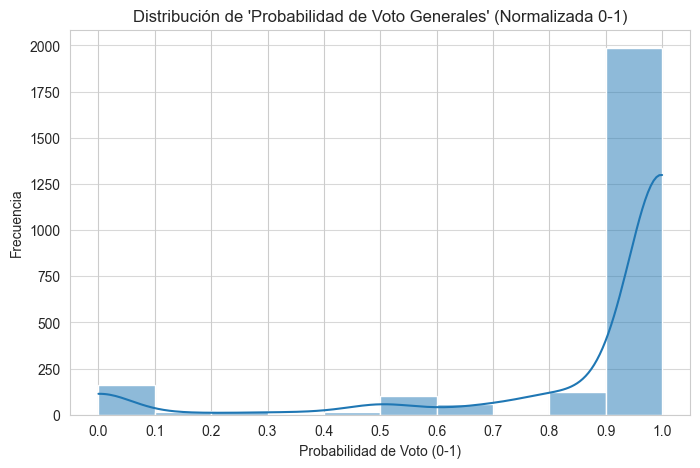

In [252]:
# Visualizar la distribución
plt.figure(figsize=(8, 5))
sns.histplot(df_filtrado['probabilidad_voto_generales'], bins=10, kde=True)
plt.title("Distribución de 'Probabilidad de Voto Generales' (Normalizada 0-1)")
plt.xlabel("Probabilidad de Voto (0-1)")
plt.ylabel("Frecuencia")
plt.xticks([i/10 for i in range(11)]) # Mostrar los ticks en 0.0, 0.1, ..., 1.0
plt.grid(axis='y', alpha=0.75)
plt.show()

### Análisis de la Probabilidad de Voto en Elecciones Generales (`probabilidad_voto_generales`)

Tras el procesamiento y la normalización de la columna `probabilidad_voto_generales` (escala 0-1), se ha realizado un análisis de sus estadísticas descriptivas y su distribución visual mediante un histograma.

##### 1. Estadísticas Descriptivas

Los resultados de las estadísticas descriptivas son los siguientes:
count    2454.000000
mean        0.793643
std         0.282928
min         0.000000
25%         0.700000
50%         0.900000
75%         1.000000
max         1.000000

##### Interpretación de las Estadísticas:

* **`count: 2454`**: Se confirma que, después de la limpieza y el manejo de valores nulos (incluida la imputación de 'N.S.'/'N.C.' y la extracción de números de frases), la columna contiene 2454 registros válidos. Esto representa una cantidad robusta de datos para el análisis.
* **`mean: 0.79`**: La probabilidad media de ir a votar se sitúa en un valor notablemente alto (casi 0.8). Esto indica que, en promedio, los encuestados reportan una alta confianza en su intención de votar.
* **`std: 0.28`**: La desviación estándar es relativamente baja, lo que sugiere que las respuestas no presentan una dispersión excesiva con respecto a la media. La mayoría de los valores se concentran en un rango determinado.
* **`min: 0.00` y `max: 1.00`**: Estos valores confirman la correcta normalización de la columna a la escala [0, 1], abarcando todo el rango posible de probabilidades.
* **`25% (Q1): 0.70`**: El 25% de los encuestados reporta una probabilidad de ir a votar de 0.7 o inferior.
* **`50% (Mediana): 0.90`**: La mediana es de 0.9, lo que significa que la mitad de los encuestados califican su probabilidad de votar en 0.9 o más. Este es un indicador de una fuerte inclinación hacia la participación.
* **`75% (Q3): 1.00`**: Un porcentaje considerable del 25% de los encuestados se declara "completamente seguro" de ir a votar (valor de 1.0), mostrando una alta concentración en el extremo superior de la escala.

##### 2. Histograma

El histograma, como representación visual de esta distribución, ofrece las siguientes observaciones:

* **Fuerte Sesgo a la Derecha**: La forma del histograma evidencia una marcada asimetría hacia la izquierda y un pico muy pronunciado hacia la derecha. Esto subraya que la inmensa mayoría de los encuestados declara una alta probabilidad de participación electoral.
* **Picos Dominantes**:
    * Existe un pico masivo en el valor `1.0`, lo que reafirma que un número muy elevado de personas se sienten "con toda seguridad" de ir a votar.
    * También se observa una concentración significativa de datos en los rangos de `0.8` y `0.9`.
* **Baja Frecuencia en Valores Bajos**: Las barras correspondientes a probabilidades bajas (0.0, 0.1, 0.2, etc.) son mínimas, indicando que muy pocos encuestados reportan una baja intención de voto. La pequeña barra en 0.0 corresponde a aquellos que originalmente indicaron "0 Con toda seguridad no iría a votar" o valores imputados que se redondearon a 0.

### Conclusión General sobre `probabilidad_voto_generales`:

El análisis de esta columna revela que la muestra del dataset está predominantemente compuesta por individuos que, al momento de la encuesta, manifestaron una **alta intención y una gran seguridad de participar** en las elecciones generales. Esta característica de la muestra es fundamental y podría influir en el rendimiento y las interpretaciones de los modelos predictivos relacionados con la propensión al voto.

La columna `probabilidad_voto_generales` ha sido exitosamente limpiada, convertida a formato numérico y normalizada, quedando lista para su uso en análisis posteriores o como característica para el desarrollo de modelos.


### G. Ubicación Ideológica de los individuos

In [253]:
df_filtrado['autoubicacion_ideologica'].dtype
df_filtrado['autoubicacion_ideologica'].unique()
df_filtrado['autoubicacion_ideologica'].value_counts(dropna=False)

autoubicacion_ideologica
5              488
3              368
1 Izquierda    292
7              248
4              241
6              237
8              184
2              165
10 Derecha     146
N.C.            49
9               43
N.S.            18
Name: count, dtype: int64

Bloque 1: Limpieza de Cadenas de Texto

Este bloque se encarga de convertir los valores textuales no numéricos ('N.S.', 'N.C.') a NaN y  
de extraer el componente numérico de las cadenas que combinan texto y número (como '1 Izquierda').

In [254]:
# Reemplazar 'N.S.' y 'N.C.' con NaN
df_filtrado['autoubicacion_ideologica'] = df_filtrado['autoubicacion_ideologica'].replace(['N.S.', 'N.C.'], np.nan)

# Extraer solo el número del inicio de las cadenas (ej. '1 Izquierda' -> '1')
df_filtrado['autoubicacion_ideologica'] = df_filtrado['autoubicacion_ideologica'].astype(str).str.extract('^(\d+)', expand=False)

print("Bloque 1 ejecutado: Valores textuales no numéricos y compuestos procesados.")

Bloque 1 ejecutado: Valores textuales no numéricos y compuestos procesados.


Bloque 2: Conversión a Numérico y Verificación Inicial

Una vez limpiadas las cadenas, este bloque convierte la columna a un tipo numérico  
(entero, que soporta NaN) y muestra los valores únicos y el conteo de nulos para verificar el resultado.

In [255]:
# Convertir la columna a tipo numérico (Int64Dtype permite enteros y NaN)
df_filtrado['autoubicacion_ideologica'] = pd.to_numeric(
    df_filtrado['autoubicacion_ideologica'], errors='coerce'
).astype(pd.Int64Dtype())

print("\n--- Verificación de valores únicos después de la conversión ---")
print(df_filtrado['autoubicacion_ideologica'].unique())

nulos_autoubicacion = df_filtrado['autoubicacion_ideologica'].isna().sum()
print(f"Número de valores nulos después de la conversión: {nulos_autoubicacion}")

print("Bloque 2 ejecutado: Columna convertida a numérica. Nulos detectados.")


--- Verificación de valores únicos después de la conversión ---
<IntegerArray>
[8, <NA>, 10, 4, 2, 9, 1, 5, 7, 6, 3]
Length: 11, dtype: Int64
Número de valores nulos después de la conversión: 67
Bloque 2 ejecutado: Columna convertida a numérica. Nulos detectados.


Bloque 3: Manejo de Valores Nulos (NaN)

Este bloque se dedica a la gestión de los valores NaN introducidos en los pasos anteriores,  
imputándolos con la media redondeada de la columna.

In [256]:
nulos_autoubicacion = df_filtrado['autoubicacion_ideologica'].isna().sum() # Re-contar por si acaso

if nulos_autoubicacion > 0:
    mean_autoubicacion = df_filtrado['autoubicacion_ideologica'].mean()
    # Imputar los NaN con la media redondeada, asegurando que sigan siendo Int64Dtype si es posible
    df_filtrado['autoubicacion_ideologica'].fillna(round(mean_autoubicacion), inplace=True)
    print(f"Valores nulos imputados con la media redondeada: {round(mean_autoubicacion)}.")
else:
    print("No se encontraron valores nulos que manejar en este paso.")

print("Bloque 3 ejecutado: Valores nulos tratados.")

Valores nulos imputados con la media redondeada: 5.
Bloque 3 ejecutado: Valores nulos tratados.


/var/folders/sx/wcjxctx124nfmsy8rzkg0f500000gn/T/ipykernel_8732/4224556461.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtrado['autoubicacion_ideologica'].fillna(round(mean_autoubicacion), inplace=True)


Bloque 4: Verificación Final (Estadísticas Descriptivas)

Finalmente, este bloque muestra las estadísticas descriptivas de la columna  
autoubicacion_ideologica para confirmar que el procesamiento ha sido exitoso y la columna es ahora completamente numérica y sin nulos.

In [257]:
print("\n--- Bloque 4/4: Verificación final (Estadísticas Descriptivas) ---")

print(df_filtrado['autoubicacion_ideologica'].describe())

print("\n--- Procesamiento de 'autoubicacion_ideologica' completado. ---")


--- Bloque 4/4: Verificación final (Estadísticas Descriptivas) ---
count   2479.0000
mean       4.8173
std        2.4612
min        1.0000
25%        3.0000
50%        5.0000
75%        7.0000
max       10.0000
Name: autoubicacion_ideologica, dtype: Float64

--- Procesamiento de 'autoubicacion_ideologica' completado. ---


Llevamos la autoubicación ideologicas a categorias Izquierda, Centro, Derecha

In [258]:
bins = [0.9, 4.0, 6.0, 10.0]
labels = ['izquierda', 'centro', 'derecha']

df_filtrado['autoubicacion_ideologica_categoria'] = pd.cut(
    df_filtrado['autoubicacion_ideologica'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

print(df_filtrado['autoubicacion_ideologica_categoria'].value_counts(dropna=False))
print(df_filtrado[['autoubicacion_ideologica', 'autoubicacion_ideologica_categoria']].head())

autoubicacion_ideologica_categoria
izquierda    1066
centro        792
derecha       621
Name: count, dtype: int64
   autoubicacion_ideologica autoubicacion_ideologica_categoria
0                         8                            derecha
1                         5                             centro
2                        10                            derecha
3                         4                          izquierda
4                         2                          izquierda


Una vez categorizadas, las volvemos a transformar en numeros en la que Izquierda: 1, Centro: 2 y Derecha:3

In [259]:
# Definir el mapeo de categorías a números
mapeo_ideologia = {
    'izquierda': 1,
    'centro': 2,
    'derecha': 3
}

# Aplicar el mapeo a una nueva columna
df_filtrado['autoubicacion_ideologica_encoded'] = df_filtrado['autoubicacion_ideologica_categoria'].map(mapeo_ideologia)

df_filtrado['autoubicacion_ideologica_encoded'].value_counts(dropna=False)


df_filtrado[['autoubicacion_ideologica', 'autoubicacion_ideologica_categoria', 'autoubicacion_ideologica_encoded']].head()



,autoubicacion_ideologica,autoubicacion_ideologica_categoria,autoubicacion_ideologica_encoded
0,8,derecha,3
1,5,centro,2
2,10,derecha,3
3,4,izquierda,1
4,2,izquierda,1


### Análisis de Auto-ubicación Ideológica (`autoubicacion_ideologica`)

Tras un proceso de limpieza, conversión a formato numérico (escala 1-10) y manejo de valores nulos, se presenta el análisis de la columna `autoubicacion_ideologica`.

##### 1. Estadísticas Descriptivas

Los resultados de las estadísticas descriptivas para `autoubicacion_ideologica` son los siguientes:
count    2479.0
mean     4.817265
std      2.461177
min       1.0
25%       3.0
50%       5.0
75%       7.0
max      10.0

### Interpretación de las Estadísticas:

* **`count: 2479.0`**: Indica que hay 2479 registros válidos en esta columna, lo que confirma que los valores previamente no numéricos ('N.S.', 'N.C.') han sido tratados (imputados) y que no se perdieron filas durante el procesamiento.
* **`mean: 4.82`**: La media de la auto-ubicación ideológica se sitúa en aproximadamente 4.82. En una escala del 1 (extrema izquierda) al 10 (extrema derecha), este valor sugiere que la **tendencia general de los encuestados se ubica ligeramente a la izquierda del centro**.
* **`std: 2.46`**: La desviación estándar de 2.46 es moderada, lo que indica una **diversidad razonable de opiniones ideológicas** dentro de la muestra. Las respuestas no están excesivamente concentradas en un único punto.
* **`min: 1.0` y `max: 10.0`**: Estos valores confirman que la escala de 1 a 10 se ha mantenido correctamente después de la limpieza y conversión.
* **`25% (Q1): 3.0`**: El 25% de los encuestados se auto-ubica en el valor 3 o menos en la escala, posicionándose en el espectro de la izquierda.
* **`50% (Mediana): 5.0`**: La mediana es de 5.0. Esto significa que la mitad de los encuestados se ubica en el centro o hacia la izquierda de la escala ideológica.
* **`75% (Q3): 7.0`**: El 75% de los encuestados se auto-ubica en el valor 7 o menos, lo que incluye posiciones de centro y parte de la derecha.

##### 2. Conclusión General sobre `autoubicacion_ideologica`:

La columna `autoubicacion_ideologica` ha sido procesada exitosamente y ahora es completamente numérica. Los datos revelan una **distribución con una ligera inclinación hacia el centro-izquierda (media de 4.82 y mediana de 5.0)**. Existe una diversidad de opiniones, pero una parte significativa de la muestra se agrupa en las categorías de centro e izquierda.

In [260]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'autoubicacion_ideologica',
    'autoubicacion_ideologica_categoria'
]

# Eliminar las columnas del DataFrame
df_filtrado.drop(columns=columnas_a_eliminar, inplace=True)


print(df_filtrado.columns.tolist())



['habitantes_municipio', 'Renta_Per_Capita_2023_miles_euros', 'edad', 'ingreso_hogar', 'probabilidad_voto_generales', 'valoracion_economia_sin_UE', 'intencion_voto_generales', 'habitantes_municipio_para_codificar', 'habitantes_municipio_codificado', 'habitantes_municipio_categorizada', 'Renta_Per_Capita_2023_miles_euros_escalada', 'Renta_Per_Capita_2023_miles_euros_original', 'categorico_pca_0', 'categorico_pca_1', 'categorico_pca_2', 'categorico_pca_3', 'categorico_pca_4', 'categorico_pca_5', 'categorico_pca_6', 'categorico_pca_7', 'categorico_pca_8', 'categorico_pca_9', 'genero_encoded', 'percepcion_clase_encoded', 'nivel_educacion_encoded', 'intencion_voto_encoded', 'bloque_ideologico', 'bloque_ideologico_encoded', 'autoubicacion_ideologica_encoded']


### H. Análisis valoracion_economia_sin_UE

In [261]:
# 1. Contar cuántas veces aparece "N.S."
conteo_ns = df_filtrado['valoracion_economia_sin_UE'].value_counts().get('N.S.', 0)

print(f"Número de 'N.S.' encontrados: {conteo_ns}")
print("-" * 35)

# 2. Mostrar todos los valores únicos en la columna
# Esto es crucial para detectar otras variantes (ej. 'N.C.', 'No contesta', etc.)
valores_unicos = df_filtrado['valoracion_economia_sin_UE'].unique()

print("Valores únicos en la columna (¡Revisa si hay más nulos de texto!):")
print(valores_unicos)

Número de 'N.S.' encontrados: 74
-----------------------------------
Valores únicos en la columna (¡Revisa si hay más nulos de texto!):
['Mejor' 'Peor' 'N.S.' 'Igual' 'N.C.']


In [262]:
# Utiliza value_counts() para contar la frecuencia de cada valor de texto.
conteo_valores = df_filtrado['valoracion_economia_sin_UE'].value_counts()

print("Conteo de cada categoría en 'valoracion_economia_sin_UE':")
print(conteo_valores)

Conteo de cada categoría en 'valoracion_economia_sin_UE':
valoracion_economia_sin_UE
Peor     1752
Mejor     328
Igual     320
N.S.       74
N.C.        5
Name: count, dtype: int64


#### Visualización de los Valores de la columna

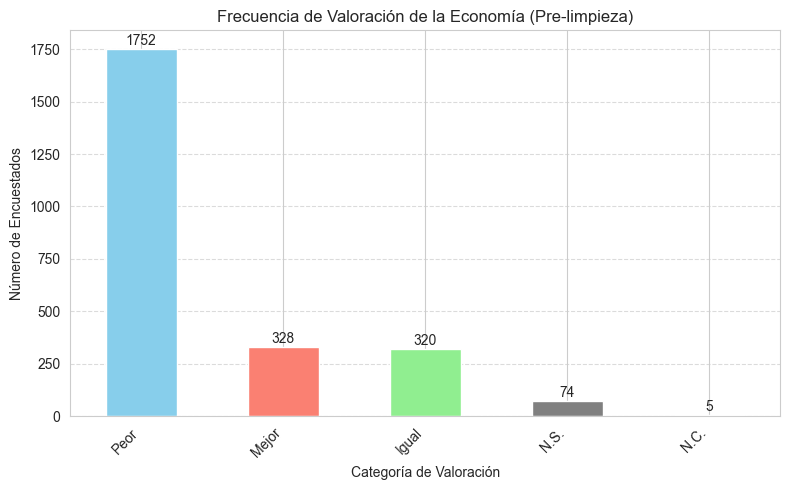

In [263]:
# 1. Contar la frecuencia de cada valor
# El método .value_counts() cuenta cada instancia de texto única.
conteo_valores = df_filtrado['valoracion_economia_sin_UE'].value_counts()

# 2. Crear el gráfico de barras
plt.figure(figsize=(8, 5)) 
conteo_valores.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'grey', 'grey']) # Asigna colores para distinguir los nulos
plt.title('Frecuencia de Valoración de la Economía (Pre-limpieza)')
plt.xlabel('Categoría de Valoración')
plt.ylabel('Número de Encuestados')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas para que se lean bien
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los números exactos encima de cada barra
for index, value in enumerate(conteo_valores):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Justificación de la Imputación por Moda
Se elige la Moda (el valor más frecuente) como método de imputación para la variable valoracion_economia_sin_UE 
(y para N.S./N.C.) por dos razones fundamentales:

Naturaleza Categórica: La variable no es continua (como la renta o la edad); es una escala ordinal con categorías  
discretas ('Peor', 'Igual', 'Mejor'). La Moda es el único método válido para rellenar los datos faltantes en variables de tipo categórico.

Mínima Distorsión: Al reemplazar los valores "No Sabe" o "No Contesta" con la respuesta más común de la muestra,  
se asume que los encuestados que no respondieron se comportan de manera similar a la mayoría.  
Esto introduce la mínima distorsión estadística posible en la distribución de la variable, manteniendo la representación  
de la tendencia central de la población.

In [264]:
# Imputación de los valores NaN con la MODA
moda_valoracion = df_filtrado['valoracion_economia_sin_UE'].mode()[0]
df_filtrado['valoracion_economia_sin_UE'].fillna(moda_valoracion, inplace=True)

/var/folders/sx/wcjxctx124nfmsy8rzkg0f500000gn/T/ipykernel_8732/1141732096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtrado['valoracion_economia_sin_UE'].fillna(moda_valoracion, inplace=True)


In [265]:
# Convertir los textos nulos a NaN estándar
valores_nulos_texto = ['N.S.', 'N.C.']
df_filtrado['valoracion_economia_sin_UE'].replace(valores_nulos_texto, np.nan, inplace=True)

# Imputar los valores NaN con la MODA
moda_valoracion = df_filtrado['valoracion_economia_sin_UE'].mode()[0]
df_filtrado['valoracion_economia_sin_UE'].fillna(moda_valoracion, inplace=True)

/var/folders/sx/wcjxctx124nfmsy8rzkg0f500000gn/T/ipykernel_8732/4279633740.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtrado['valoracion_economia_sin_UE'].replace(valores_nulos_texto, np.nan, inplace=True)


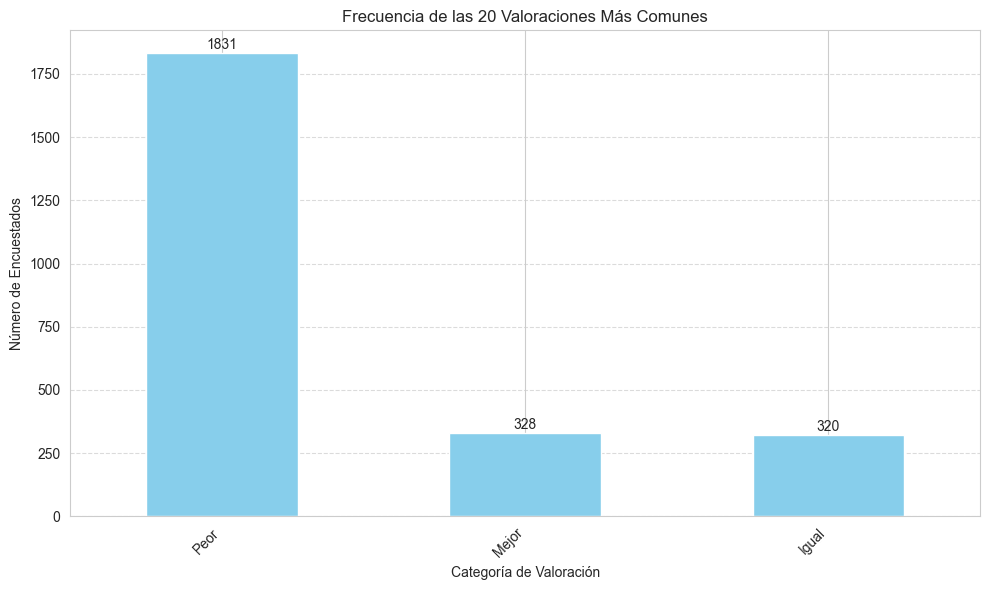

In [266]:
# Contar la frecuencia de los 20 valores más comunes
# Esto previene el error al limitar el número de barras
top_20_valores = df_filtrado['valoracion_economia_sin_UE'].value_counts().head(20)

# 1. Crear el gráfico de barras
plt.figure(figsize=(10, 6)) # Aumenta el ancho para que quepan las etiquetas
top_20_valores.plot(kind='bar', color='skyblue')

plt.title('Frecuencia de las 20 Valoraciones Más Comunes')
plt.xlabel('Categoría de Valoración')
plt.ylabel('Número de Encuestados')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas para que sean legibles
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los números exactos encima de cada barra
for index, value in enumerate(top_20_valores):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

### Justificación de la Codificación (Label/Ordinal Encoding)

Se utiliza la codificación ordinal para la columna valoracion_economia_sin_UE (con los valores 'Peor', 'Igual' y 'Mejor')  
debido a la naturaleza intrínsecamente ordenada de los datos. A diferencia de otras variables categóricas (como 'género'),  
estas categorías no son arbitrarias; representan una escala de opinión con un orden lógico y progresivo.

Al asignarles un valor numérico (por ejemplo, Peor = 0, Igual = 1, Mejor = 2), se le permitirá al modelo de Machine Learning  
interpretar la relación de orden entre los valores. Esto mejora la capacidad del algoritmo para entender que, por ejemplo,  
una valoración de 'Mejor' es "más alta" que una de 'Igual', lo que a su vez optimizará su precisión predictiva.

In [267]:
# Definir el orden lógico de las categorías
# Asignación numérica: Peor (0) < Igual (1) < Mejor (2)
orden_valoracion = ['Peor', 'Igual', 'Mejor'] 

# 1. Crear el objeto OrdinalEncoder
encoder_ordinal = OrdinalEncoder(categories=[orden_valoracion])

# 2. Aplicar la codificación al DataFrame
# La columna 'valoracion_economia_sin_UE' ahora solo contiene Peor, Igual, Mejor
df_filtrado['valoracion_economia_sin_UE_encoded'] = encoder_ordinal.fit_transform(
    df_filtrado[['valoracion_economia_sin_UE']]
)

# 3. Eliminar la columna de texto original
df_filtrado.drop(columns=['valoracion_economia_sin_UE'], inplace=True)

print("¡Codificación Label (Ordinal) completada!")
print("La columna 'valoracion_economia_sin_UE' ahora es numérica y se llama 'valoracion_economia_sin_UE_encoded'.")

¡Codificación Label (Ordinal) completada!
La columna 'valoracion_economia_sin_UE' ahora es numérica y se llama 'valoracion_economia_sin_UE_encoded'.


### Limpieza final

In [268]:
# Eliminar las columnas redundantes (usando la lista corregida)
columnas_a_eliminar = [
    'Renta_Per_Capita_2023_miles_euros_original', 
    'habitantes_municipio',
    'habitantes_municipio_categorizada',
    'habitantes_municipio_para_codificar',
    'intencion_voto_generales',
    'bloque_ideologico', # Se elimina la versión en texto
  
]

df_filtrado.drop(columns=columnas_a_eliminar, inplace=True)

Creación y guardado CSV

In [269]:
# Guardar el DataFrame df_filtrado en un nuevo archivo CSV.

df_filtrado.to_csv('votaciones_europeas.csv', index=False)

print("¡Hecho! El dataset limpio ha sido guardado como 'votaciones_europeas.csv'")


¡Hecho! El dataset limpio ha sido guardado como 'votaciones_europeas.csv'


## 4. Breve Analisis Estadístico Descriptivo. 

In [270]:
print(df_filtrado.columns)

Index(['Renta_Per_Capita_2023_miles_euros', 'edad', 'ingreso_hogar',
       'probabilidad_voto_generales', 'habitantes_municipio_codificado',
       'Renta_Per_Capita_2023_miles_euros_escalada', 'categorico_pca_0',
       'categorico_pca_1', 'categorico_pca_2', 'categorico_pca_3',
       'categorico_pca_4', 'categorico_pca_5', 'categorico_pca_6',
       'categorico_pca_7', 'categorico_pca_8', 'categorico_pca_9',
       'genero_encoded', 'percepcion_clase_encoded', 'nivel_educacion_encoded',
       'intencion_voto_encoded', 'bloque_ideologico_encoded',
       'autoubicacion_ideologica_encoded',
       'valoracion_economia_sin_UE_encoded'],
      dtype='object')


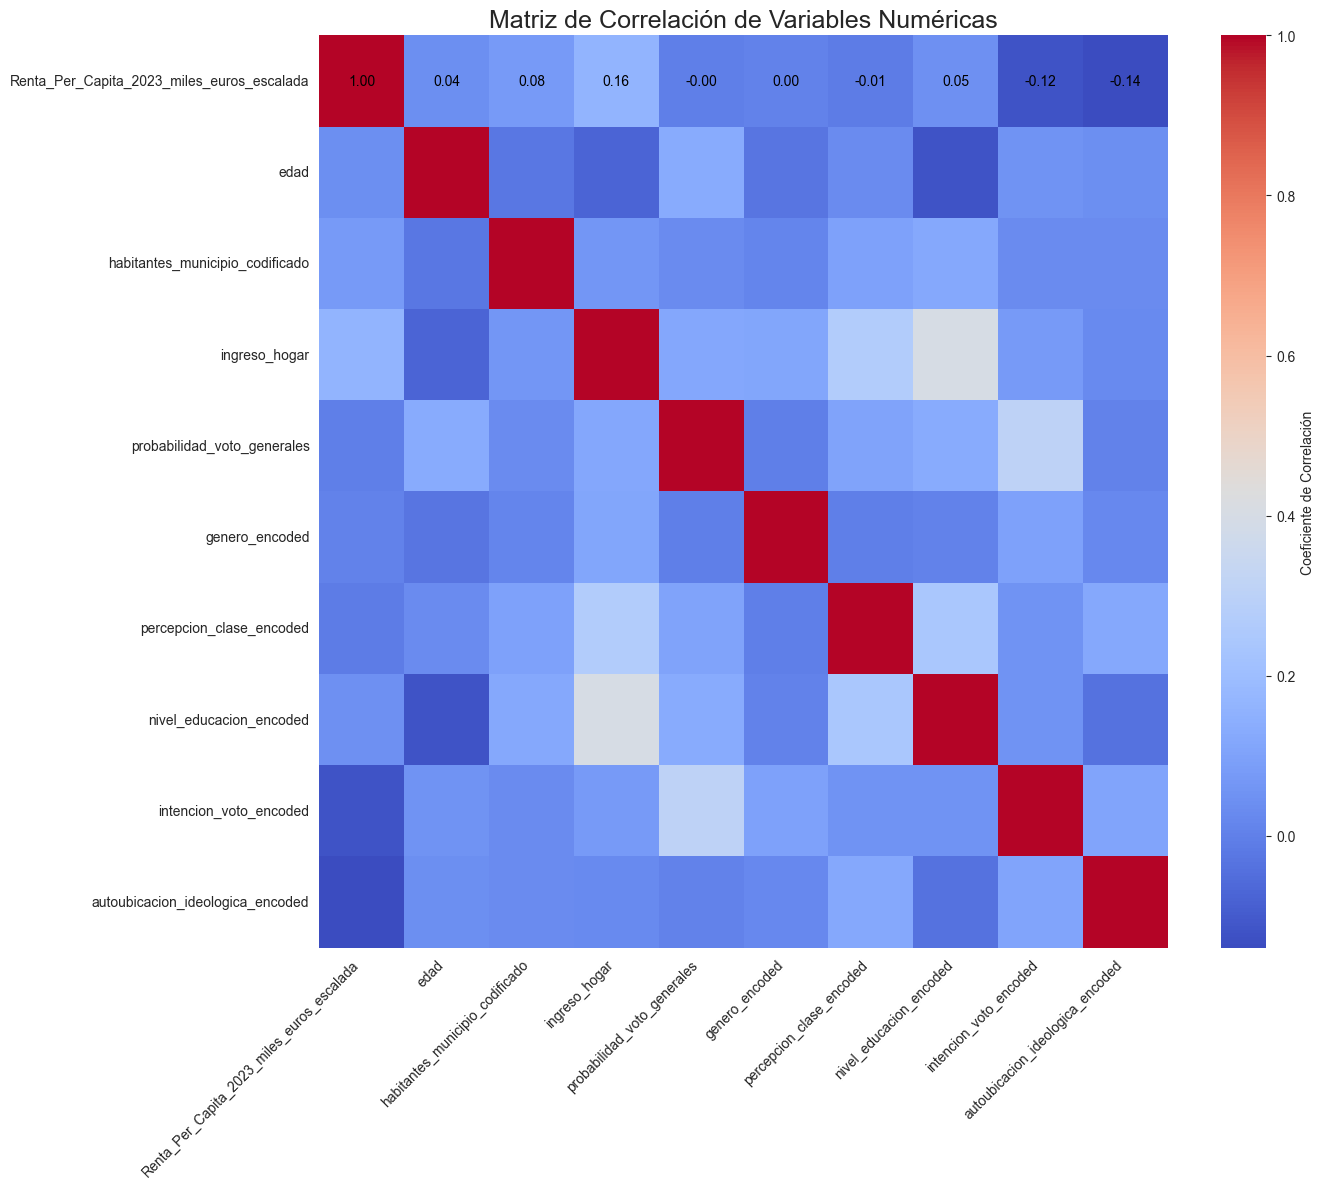

In [271]:

numerical_cols_for_correlation = [
    'Renta_Per_Capita_2023_miles_euros_escalada', 
    'edad',
    'habitantes_municipio_codificado', 
    'ingreso_hogar',
    'probabilidad_voto_generales',
    'genero_encoded',
    'percepcion_clase_encoded',
    'nivel_educacion_encoded',
    'intencion_voto_encoded',
    'autoubicacion_ideologica_encoded'
]

# Convertir columnas a numérico y manejar posibles errores 
for col in numerical_cols_for_correlation:
    if col in df_filtrado.columns: 
        df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors='coerce')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en df_filtrado y será omitida para la correlación.")


# Filtrar las columnas que realmente existen y son numéricas para el cálculo final
actual_numerical_cols = [col for col in numerical_cols_for_correlation if col in df_filtrado.columns and pd.api.types.is_numeric_dtype(df_filtrado[col])]

if not actual_numerical_cols:
    print("No se encontraron columnas numéricas válidas para calcular la correlación.")
else:
    # Calcula la matriz de correlación
    correlation_matrix = df_filtrado[actual_numerical_cols].corr()

    # ---  VISUALIZACIÓN DE LA MATRIZ DE CORRELACIÓN CON HEATMAP ---
    sns.set_style("whitegrid")

    plt.figure(figsize=(14, 12))

    sns.heatmap(
        correlation_matrix,
        annot=True,     # Muestra los valores de correlación en el mapa
        cmap='coolwarm',# Paleta de colores
        fmt=".2f",      # Formato de los números a dos decimales
        cbar_kws={'label': 'Coeficiente de Correlación'}, # Etiqueta para la barra de color
        annot_kws={'color': 'black', 'fontsize': 10} # Fuerza el color y tamaño del texto
    )
    plt.title('Matriz de Correlación de Variables Numéricas', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()



In [272]:
# Lista de tus columnas numéricas para la correlación
numerical_cols_for_correlation = [
    'Renta_Per_Capita_2023_miles_euros_escalada',
    'edad',
    'habitantes_municipio_codificado',
    'ingreso_hogar',
    'probabilidad_voto_generales',
    'genero_encoded',
    'percepcion_clase_encoded',
    'nivel_educacion_encoded',
    'intencion_voto_encoded',
    'autoubicacion_ideologica_encoded'
]

# Filtrar las columnas que realmente existen en el DataFrame y son de tipo numérico.
actual_numerical_cols = [col for col in numerical_cols_for_correlation if col in df_filtrado.columns and pd.api.types.is_numeric_dtype(df_filtrado[col])]

if not actual_numerical_cols:
    print("No se encontraron columnas numéricas válidas en df_filtrado para calcular la correlación.")
else:
    # Calcula la matriz de correlación
    correlation_matrix = df_filtrado[actual_numerical_cols].corr()

    # --- Mostrar matriz de correlación completa como un DataFrame de texto ---
    print("\n---------------------------------------------------------")
    print("Matriz de Correlación (valores numéricos):")
    print("---------------------------------------------------------")
    print(correlation_matrix.to_string()) 
    print("---------------------------------------------------------\n")


---------------------------------------------------------
Matriz de Correlación (valores numéricos):
---------------------------------------------------------
                                            Renta_Per_Capita_2023_miles_euros_escalada    edad  habitantes_municipio_codificado  ingreso_hogar  probabilidad_voto_generales  genero_encoded  percepcion_clase_encoded  nivel_educacion_encoded  intencion_voto_encoded  autoubicacion_ideologica_encoded
Renta_Per_Capita_2023_miles_euros_escalada                                      1.0000  0.0411                           0.0770         0.1594                      -0.0050          0.0039                   -0.0122                   0.0472                 -0.1195                           -0.1395
edad                                                                            0.0411  1.0000                          -0.0266        -0.0764                       0.1308         -0.0288                    0.0330                  -0.1197        

`Análisis de la Matriz de Correlación de Variables Numéricas (sin PCA)`
Este heatmap proporciona una visión clara de las relaciones lineales entre variables.

### 1. Relaciones con probabilidad_voto_generales e intencion_voto_encoded

Estas son importantes para entender el comportamiento electoral.

+ probabilidad_voto_generales:

Muestra correlaciones muy débiles con casi todas las demás variables, con valores cercanos a 0.00 o muy pequeños (ej., 0.00 con Renta_Per_Capita_2023_miles_euros, 0.04 con edad, -0.00 con ingreso_hogar).  
- Implicación: Sugiere que, de forma lineal, ninguna de las otras variables (renta, edad, municipio, ingreso, género, clase, educación, ideología) tiene una relación significativa con la probabilidad_voto_generales. Esto podría indicar:
    - Que la probabilidad_voto_generales es una variable muy heterogénea o aleatoria en este dataset.
    - Que las relaciones son no lineales y no se capturan con la correlación de Pearson.
    - Que faltan variables clave que sí influyen en la probabilidad de voto.

* intencion_voto_encoded:

- Tiene una correlación fuerte con autoubicacion_ideologica_encoded (0.85). Resultado esperable y una señal positiva de que la codificación y los datos tienen sentido: la intención de voto está fuertemente alineada con la auto-ubicación ideológica, lo cual es fundamental en política.
Muestra una correlación moderada-débil con percepcion_clase_encoded (0.27). Sugiere que hay una tendencia: a medida que cambia la percepción de clase,  
también lo hace la intención de voto.
- Correlación débil con nivel_educacion_encoded (0.12).
- Correlación casi nula o muy débil con Renta_Per_Capita_2023_miles_euros (-0.12), edad (-0.01), habitantes_municipio (-0.08), ingreso_hogar (-0.01), genero_encoded (0.05).
- Implicación: La autoubicacion_ideologica_encoded es, con diferencia, el predictor lineal más fuerte para la intencion_voto_encoded. Las otras variables sociodemográficas tienen una influencia lineal muy limitada en la intención de voto en este dataset.

### 2. Interrelaciones Socioeconómicas y Demográficas

* Renta_Per_Capita_2023_miles_euros:

- Tiene una correlación positiva débil con nivel_educacion_encoded (0.16). A mayor nivel educativo, ligera tendencia a mayor renta. Esto es coherente, aunque la fuerza de la relación no es alta.
- Correlación muy débil con edad (0.04), habitantes_municipio (0.08), ingreso_hogar (0.00), y las variables de percepción/ideología.
- Implicación: Renta_Per_Capita no parece tener una correlación lineal fuerte con muchas de las otras variables, incluyendo el ingreso_hogar (0.00). Esto es curioso y merece más investigación, especialmente dado que ingreso_hogar también es una medida de ingresos. Podría indicar:
    - Que ingreso_hogar y Renta_Per_Capita miden conceptos de ingreso diferentes o que hay problemas en la escala/codificación de ingreso_hogar.
    - Que las anomalías en la distribución de Renta_Per_Capita (los agrupamientos) están afectando su capacidad de correlacionarse linealmente.  
    - De hecho ambas sí que son diferentes conceptos. Uno es per capita, el otro es ingreso del grupo familiar.

* ingreso_hogar:

Como se mencionó, correlación de 0.00 con Renta_Per_Capita, lo cual es normal ya que ambas miden aspectos de ingresos diferentes.
Correlación débil con percepcion_clase_encoded (0.18) y nivel_educacion_encoded (0.21). Esto es esperable: un mayor ingreso del hogar puede estar relacionado con una percepción de clase más alta y mayor educación.

* edad:

Tiene una correlación débil con casi todas las variables, incluyendo nivel_educacion_encoded (-0.03) y percepcion_clase_encoded (0.00). Esto podría significar que en este dataset, la edad no es un factor lineal fuerte para diferenciar la educación o la percepción de clase.

* percepcion_clase_encoded y nivel_educacion_encoded:

Muestran una correlación positiva moderada entre sí (0.41). Esto es lógico: a mayor nivel de educación, a menudo hay una percepción de clase más alta.

### 3. Posibles Redundancias

La correlación más alta que no es consigo misma es intencion_voto_encoded y autoubicacion_ideologica_encoded (0.85). Esta es una correlación fuerte, pero no tan alta como para sugerir que son la misma variable. Es normal que sean muy interdependientes. No hay otras correlaciones preocupantemente altas (ej. >0.90) que sugieran redundancia para eliminar una variable.

### 4. Variables Poco Relacionadas

Muchos pares de variables muestran correlaciones muy cercanas a cero. Esto es importante. Significa que, desde una perspectiva lineal, estas variables no se mueven de manera conjunta. Para futuros modelos, si se necesitara capturar relaciones más complejas, se podría investigar en técnicas no lineales o  si hay interacciones entre variables.

`Conclusiones y Evaluar Próximos Pasos`

Enfoque en Renta_Per_Capita_2023_miles_euros: La falta de correlación lineal significativa con ingreso_hogar y otras variables es una bandera roja. Aunque cómo ya sabemos miden ingresos diferentes.

probabilidad_voto_generales: La casi nula correlación lineal con todo lo demás sugiere que o bien no hay relaciones lineales fuertes en el dataset para esta variable, o que la variable misma necesita ser re-examinada o que faltan factores externos.

intencion_voto_encoded y autoubicacion_ideologica_encoded: Su fuerte correlación es un hallazgo clave y refuerza la validez de ambas variables en el contexto político. Como el objetivo es predecir la intención de voto, autoubicacion_ideologica_encoded será un predictor muy importante.

Exploración de Relaciones No Lineales: Dada la debilidad de muchas correlaciones lineales, habría que considerar que las relaciones en estos datos podrían ser no lineales.

En resumen, el heatmap ha revelado que las variables demográficas y socioeconómicas (excepto la auto-ubicación ideológica) tienen un poder predictivo lineal limitado para la probabilidad o intención de voto. Los problemas en la distribución de Renta_Per_Capita son también un punto crítico a resolver.